In [10]:
import sys
sys.path.append("../")
sys.path.append("../..")

import numpy as np
import matplotlib.pyplot as plt
from tqdm import *
from scipy.integrate import nquad
import matplotlib as mpl
import matplotlib.pylab as pylab
from matplotlib.animation import FuncAnimation

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from matplotlib import animation
from IPython.display import HTML

from theory.units import *
from theory.spec_calc import PowerSpectra
from simulation.demo_sim import DemoSim

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Demo animations/figures

This notebook describes the interface for creating lensing animations as lenses pass through a stellar field.

In [185]:
from plot_params import params

pylab.rcParams.update(params)
cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']
output_dir = "../plots/"

/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


The main interface is through the class `DemoSim`, which takes `theta_x_lims` and `theta_y_lims` as arguments. These are 2-arrays that describe the `x` and `y` coordinate limits of the figure, in arcsecs.

`DemoSim.animation()` creates the figure or animation. Its arguments are specified in the docstring:

        """
        :param pos_l: tuple of lens positions, format [[x_1, y_1], [x_2, y_2]...]
        :param M_l: tuple of lens masses
        :param R_l: tuple of lens sizes (Gaussian lens)
        :param v_l: tuple of lens velocities
        :param D_l: tuple of distances of lenses
        :param n_lens_x: number of x-grid points across canvas to plot lenses; default 200
        :param n_lens_y: number of y-grid points across canvas to plot lenses; default 200
        :param n_dens: density of sources (per arcsecs^2); default 20
        :param source_pos: must be one of ["uniform", "random"]; default "random"
        :param custom_source_pos: optional custom positions to put down sources, format [[x_1, y_1], [x_2, y_2]...]
        :param arrow_mult: stretch velocity arrows by this factor; default 2000
        :param figsize: size of canvas, according to matplotlib format; default (16, 9)
        :param animate: whether to animate; default True
        :param dt: cosmological time interval between subsequent animation frames; default 10 [years]
        :param interval: real time interval between subsequent animation frames; default 10 ms
        :param n_frames: number of frames to animate; default 100
        :param show_lens: whether to plot lens; default True
        :param show_sources: whether to plot sources; default True
        :param show_orig: whether to plot unperturbed sources; default False
        :param show_vel_arrows: whether to plot instantaneous velocity vectors; default False
        :param star_kwargs: star plotting options; matplotlib defaults by default
        :param star_orig_kwargs: unperturbed star plotting options; matplotlib defaults by default
        :param arrow_kwargs: arrow plotting options; matplotlib defaults by default
        :return: animation or figure, depending on whether `animation=True` or `animation=False`
        """

The animation/figure returned by `DemoSim.animation()` can be saved as usual with plt.savefig() if `animation=False`, or

- viewed with HTML(anim.to_html5_video()) for inline video,
- `anim.save("output.mp4")` to save mp4 video,
- `anim.save("output.gif", writer='imagemagick', fps=25) to save a gif.

## Uniform star grid

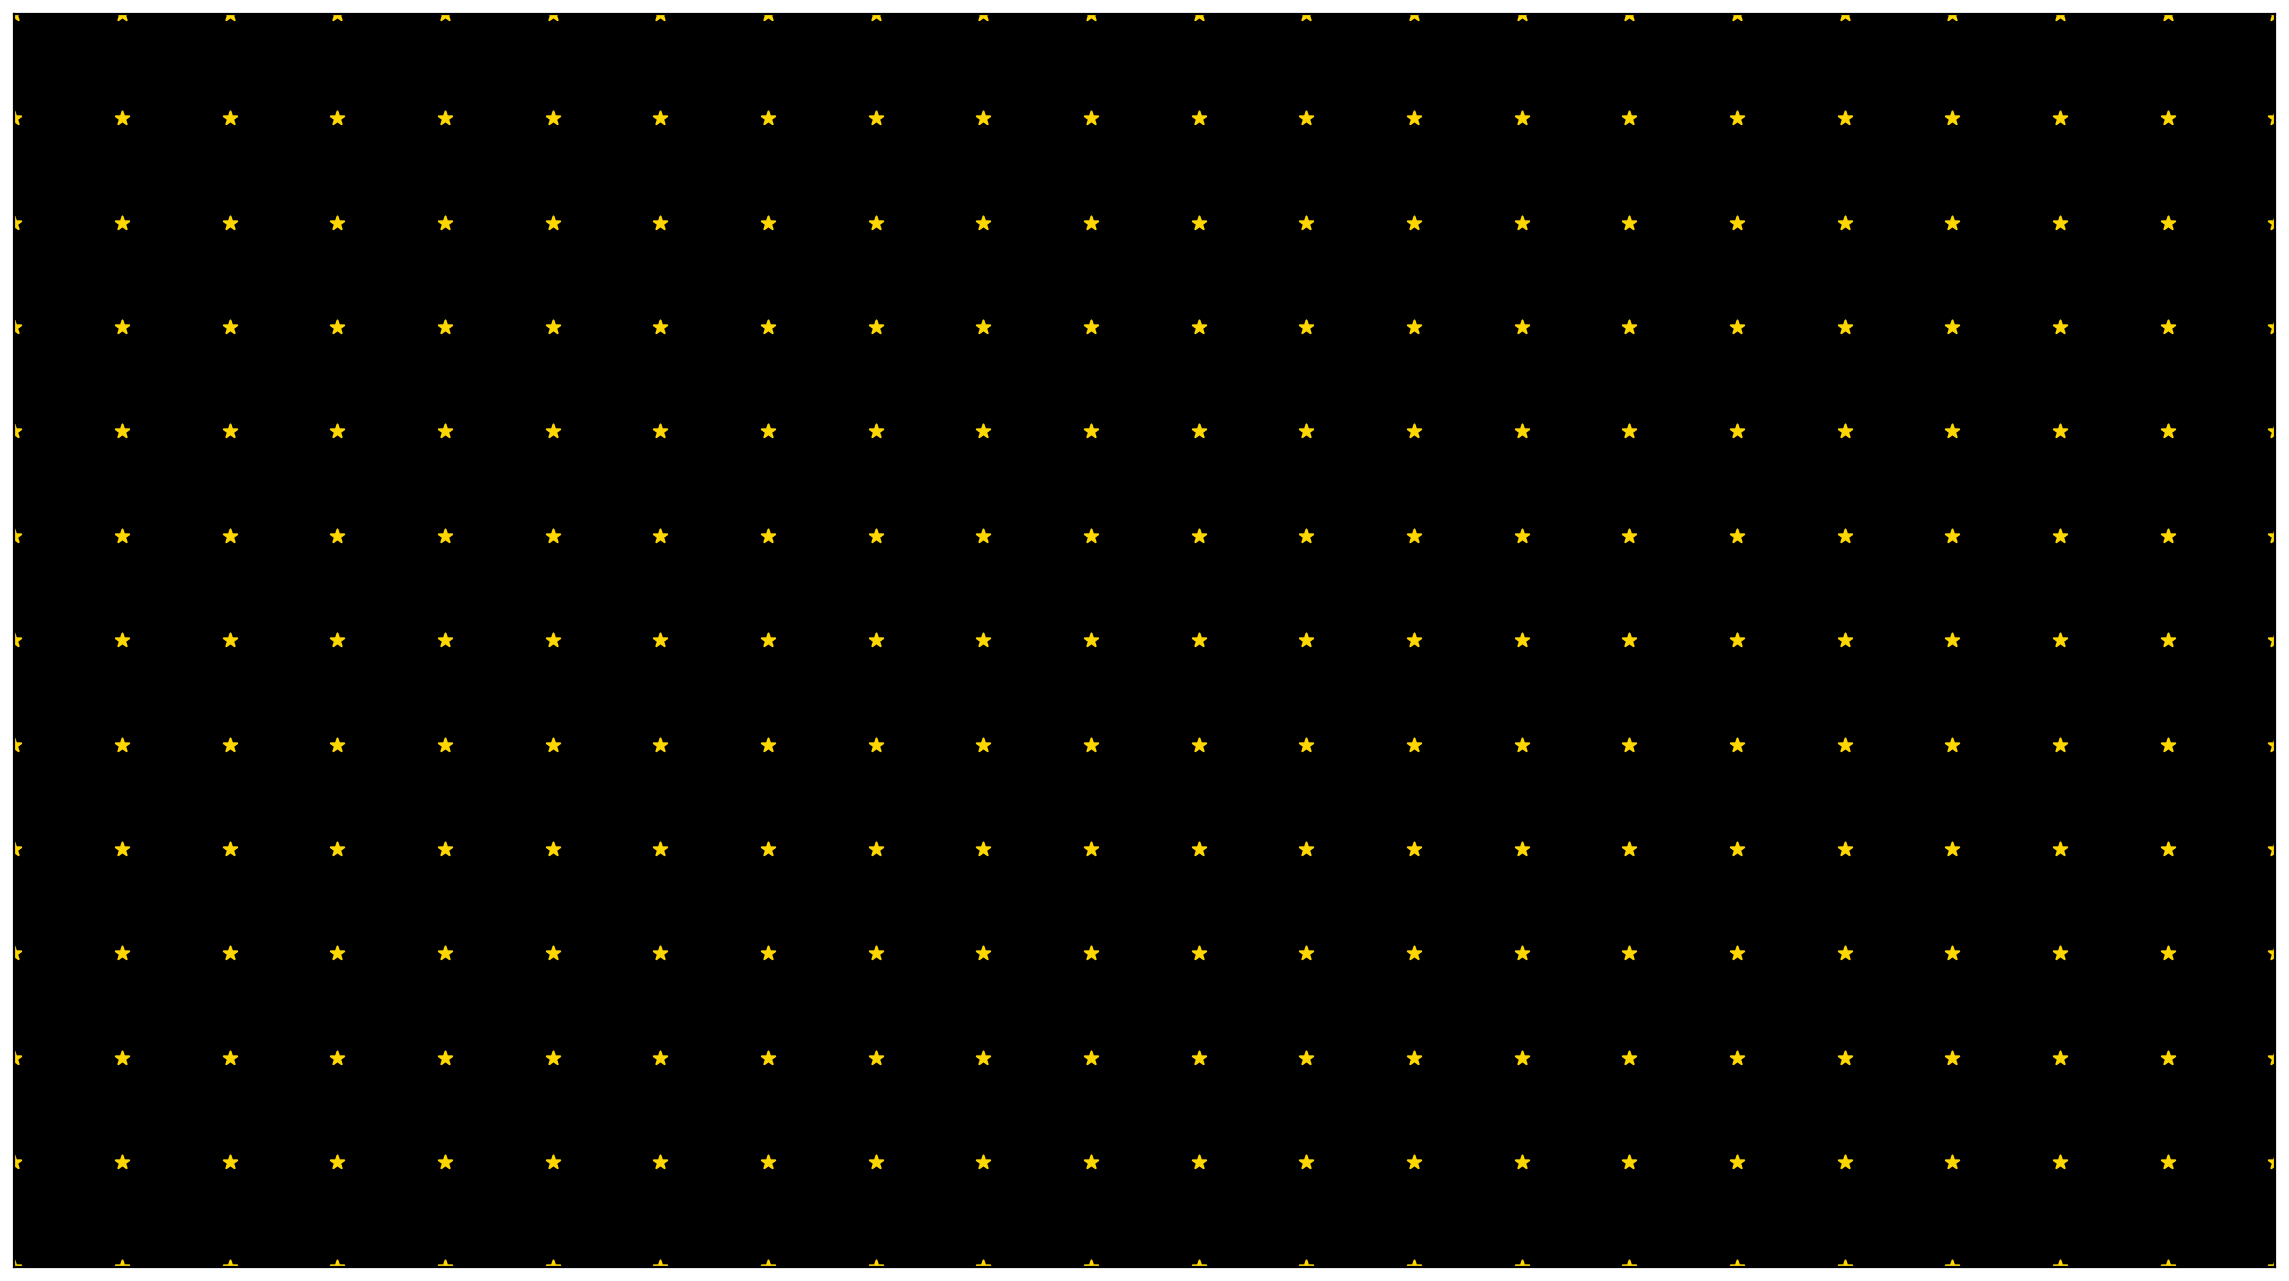

In [13]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9]
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'gold','s':50}


anim = ds.animation(dt=10, 
                    pos_l=np.array([[-.8,0],[.5,.5]]), v_l=np.array([[50,0],[50,-100]]) * Kmps, R_l=[0.1 * pc, 0.05 *pc], M_l=[5e5 * M_s, 1e5 * M_s],
                    D_l=[100 * kpc, 100 * kpc], n_frames=500, arrow_mult=2000, animate=False, show_lens=False, show_vel_arrows=False, show_sources=False, show_orig=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs,
                    star_orig_kwargs=star_orig_kwargs, n_dens = 50,
                    source_pos="uniform")

plt.tight_layout()
plt.savefig(output_dir + "uniform.pdf")


## Uniform star grid with lens

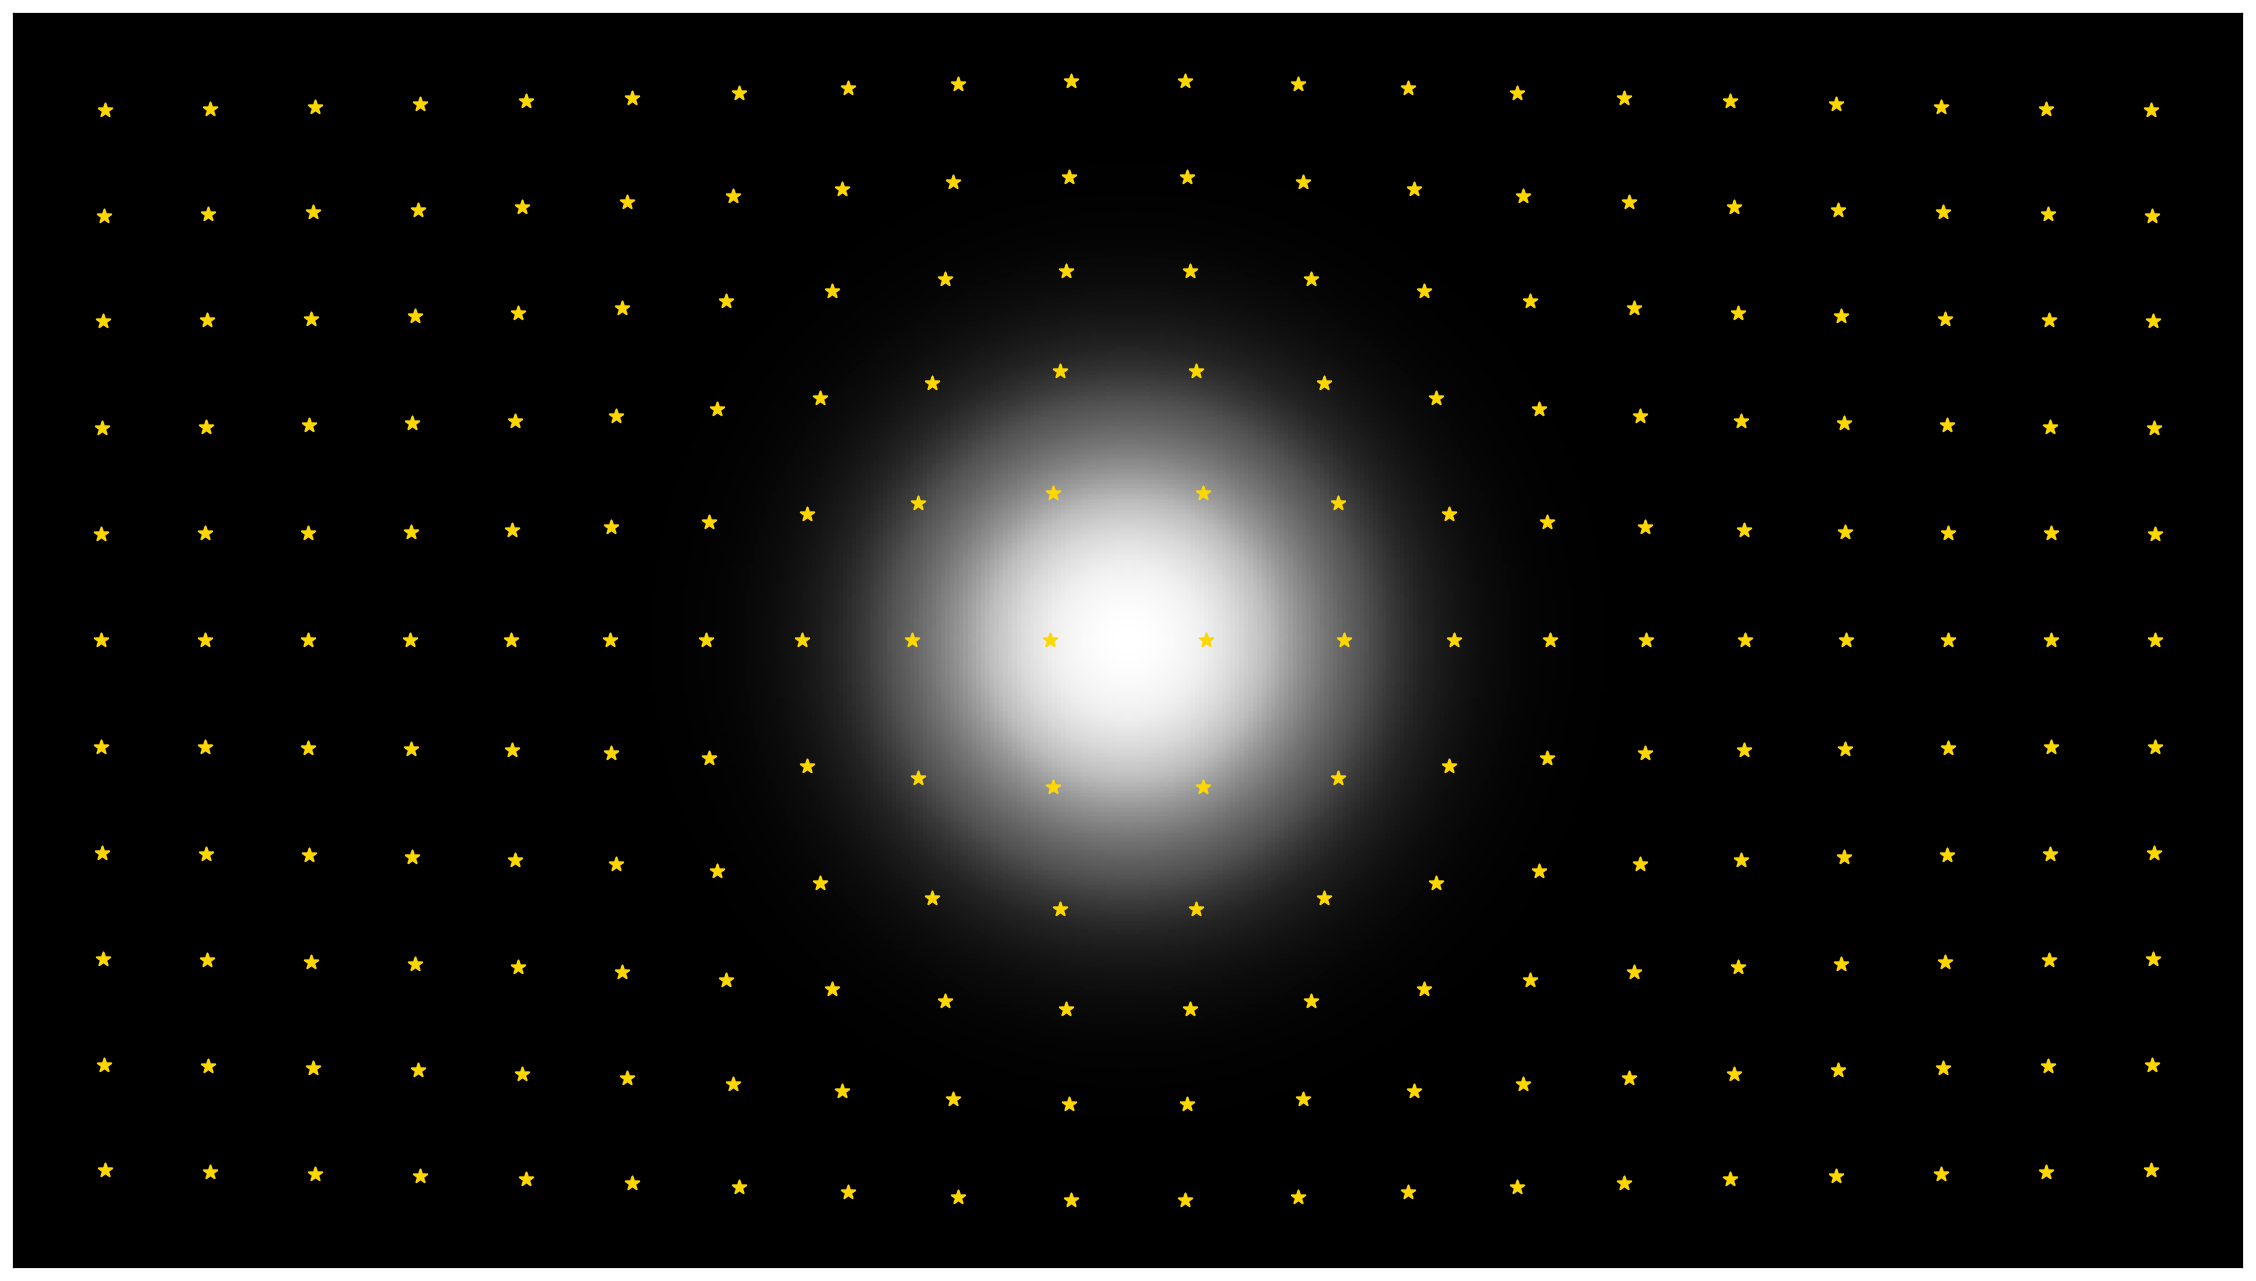

In [14]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9]
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'gold','s':50}


anim = ds.animation(dt=10, 
                    pos_l=np.array([[0,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.1 * pc], M_l=[5e5 * M_s],
                    D_l=[100 * kpc], n_frames=500, arrow_mult=2000, animate=False, show_lens=True, show_vel_arrows=False, show_sources=True, show_orig=False,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs,
                    star_orig_kwargs=star_orig_kwargs, n_dens = 50,
                    source_pos="uniform")

plt.tight_layout()
plt.savefig(output_dir + "uniform_lens.pdf")


## Uniform star grid with lens, not showing lens

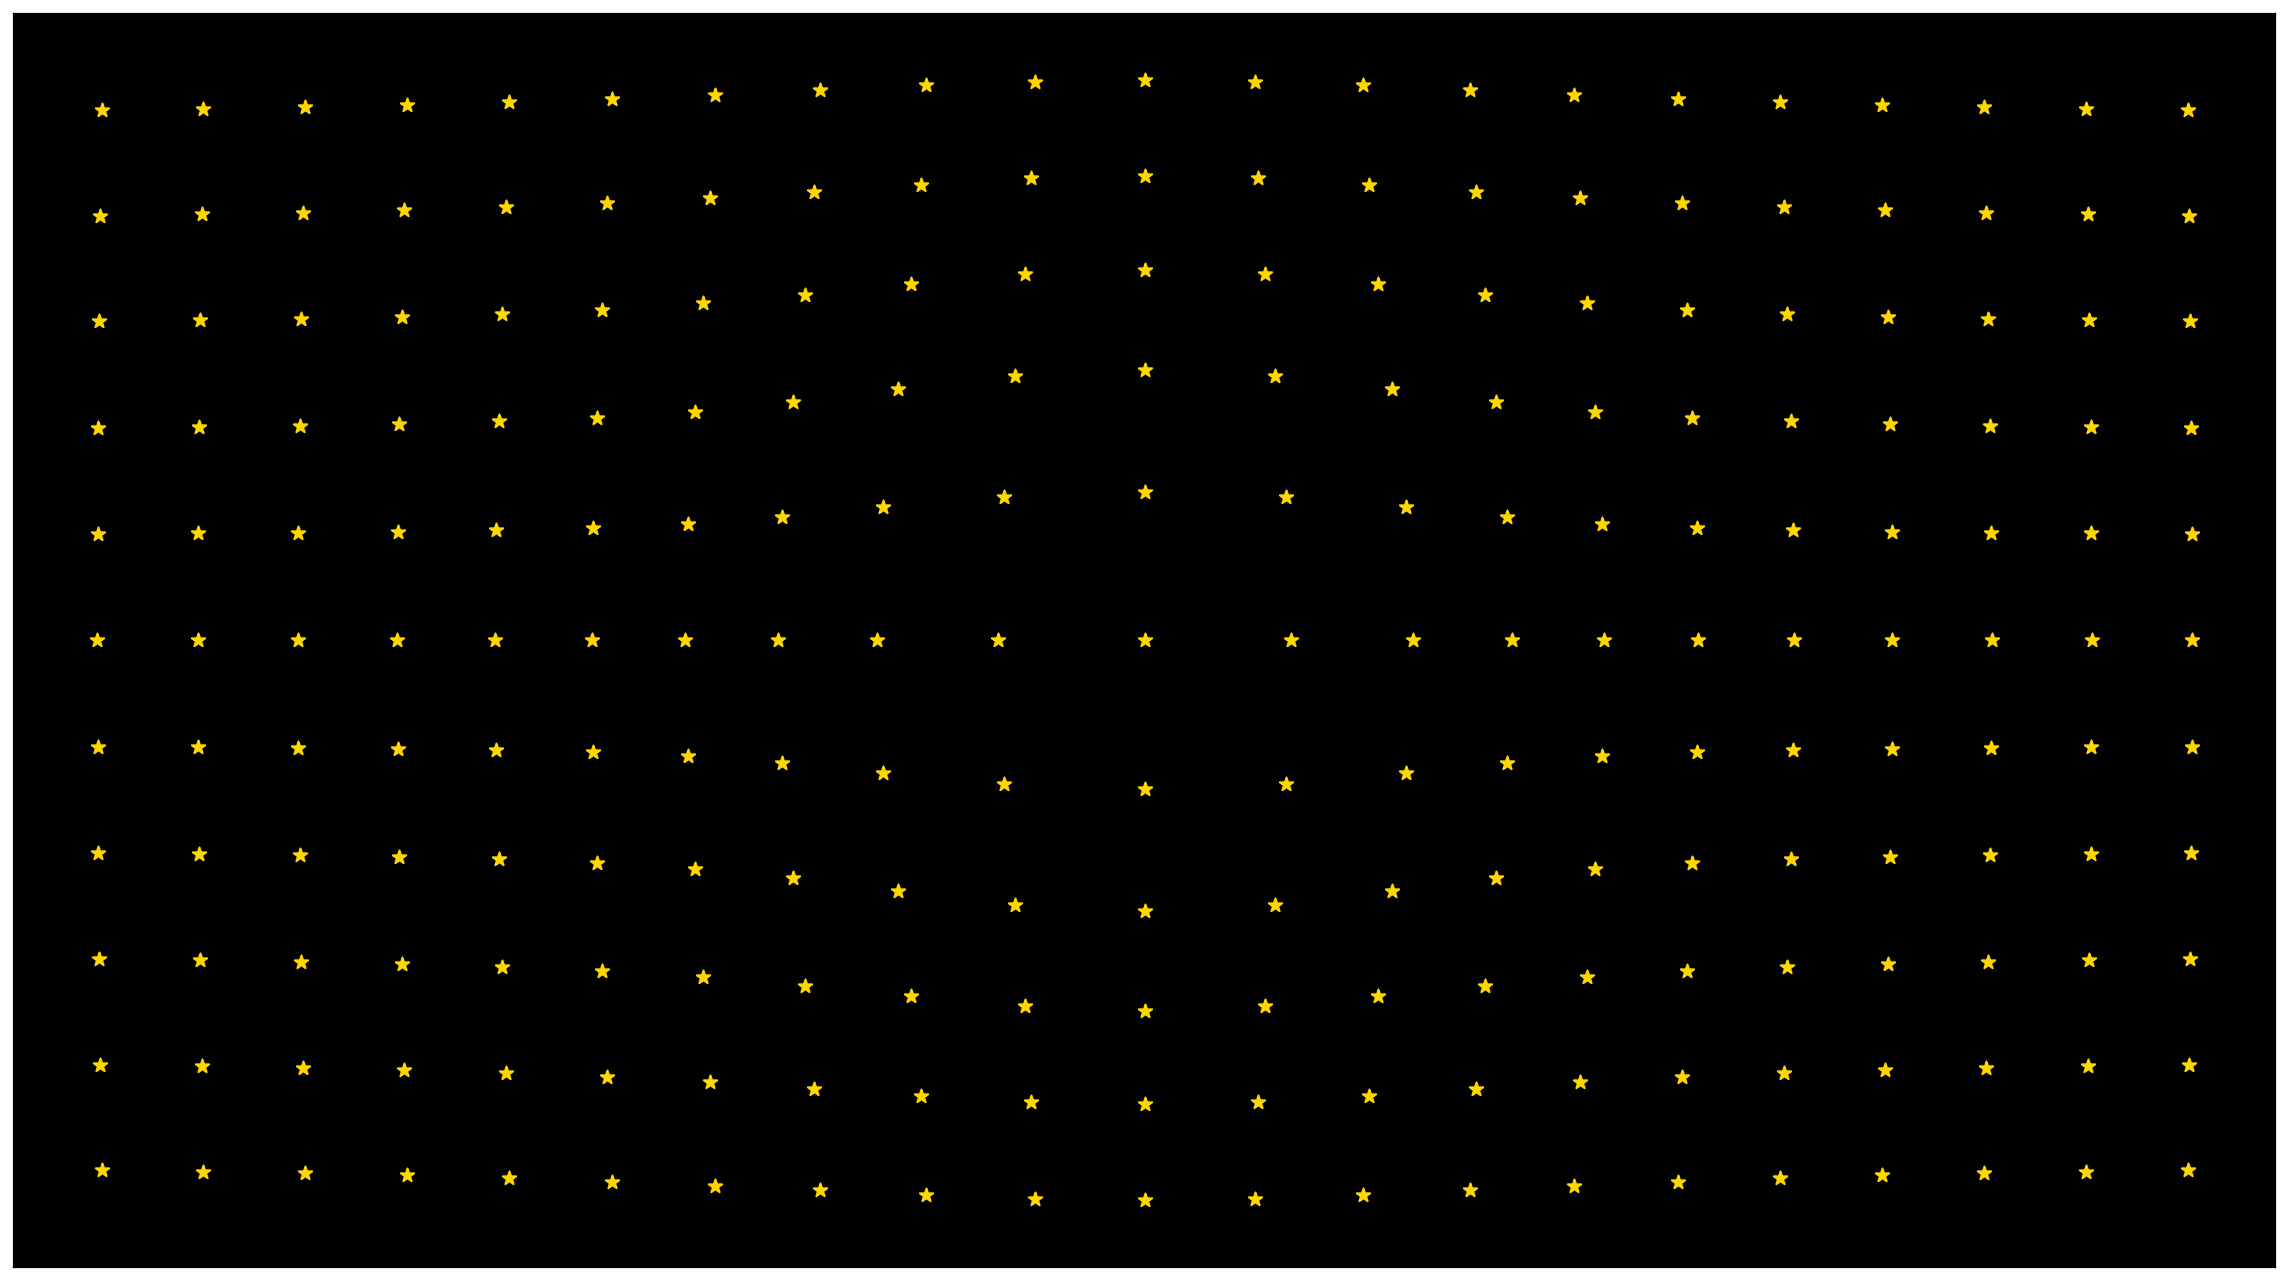

In [15]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9]
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'gold','s':50}


anim = ds.animation(dt=10, 
                    pos_l=np.array([[0,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.1 * pc], M_l=[5e5 * M_s],
                    D_l=[100 * kpc], n_frames=500, arrow_mult=2000, animate=False, show_lens=False, show_vel_arrows=False, show_sources=True, show_orig=False,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs,
                    star_orig_kwargs=star_orig_kwargs, n_dens = 50,
                    source_pos="uniform")

plt.tight_layout()
plt.savefig(output_dir + "uniform_lens_nolens.pdf")


## Non-uniform star grid with lens

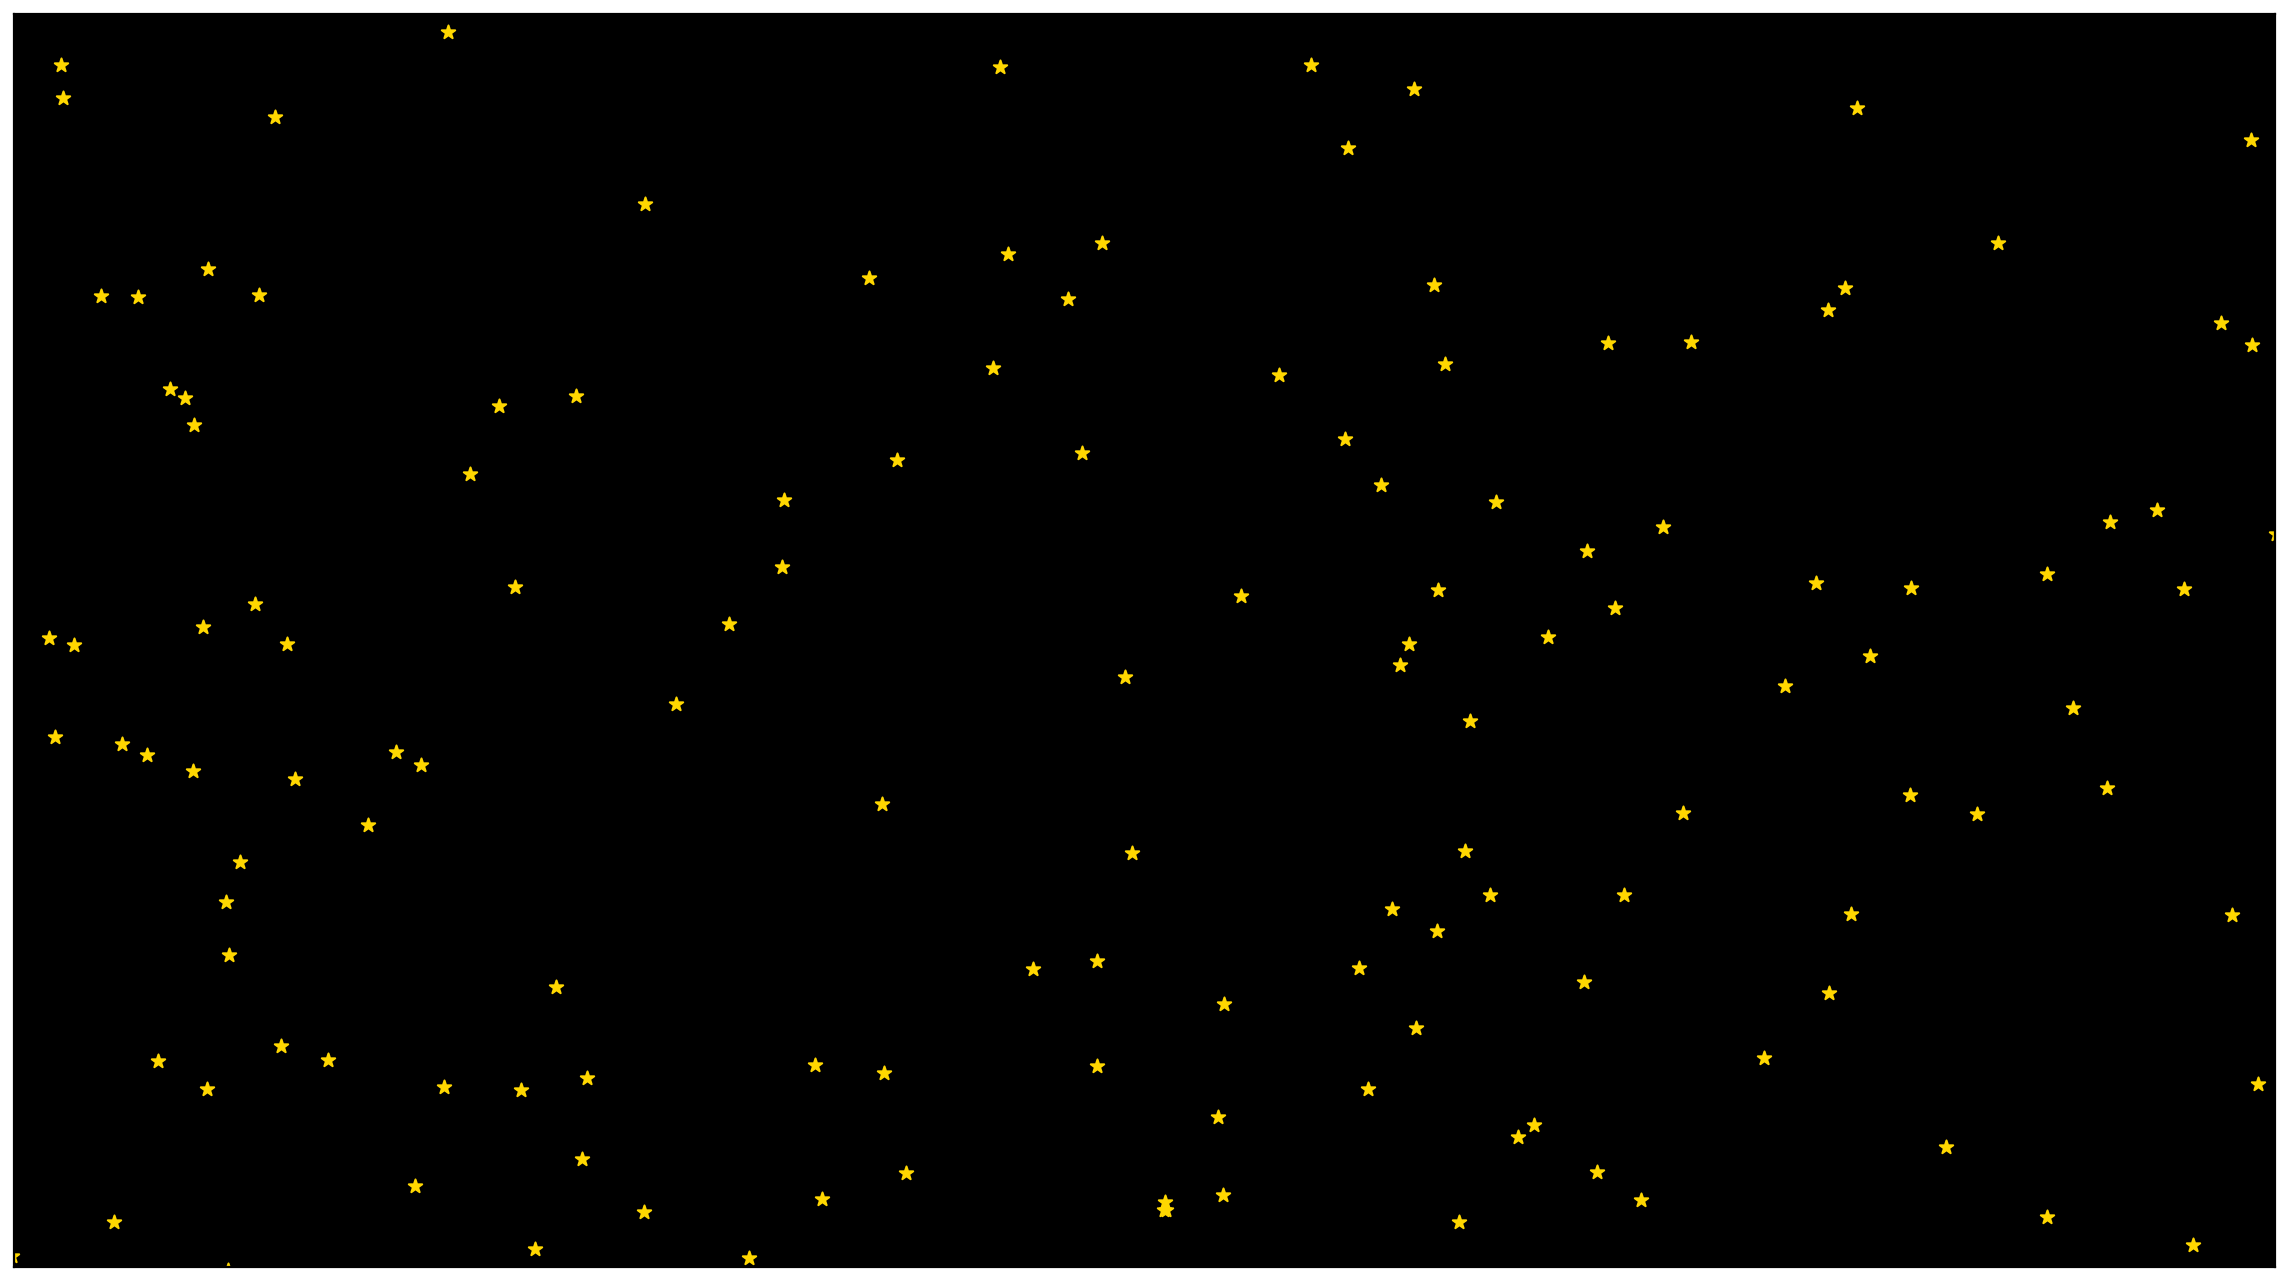

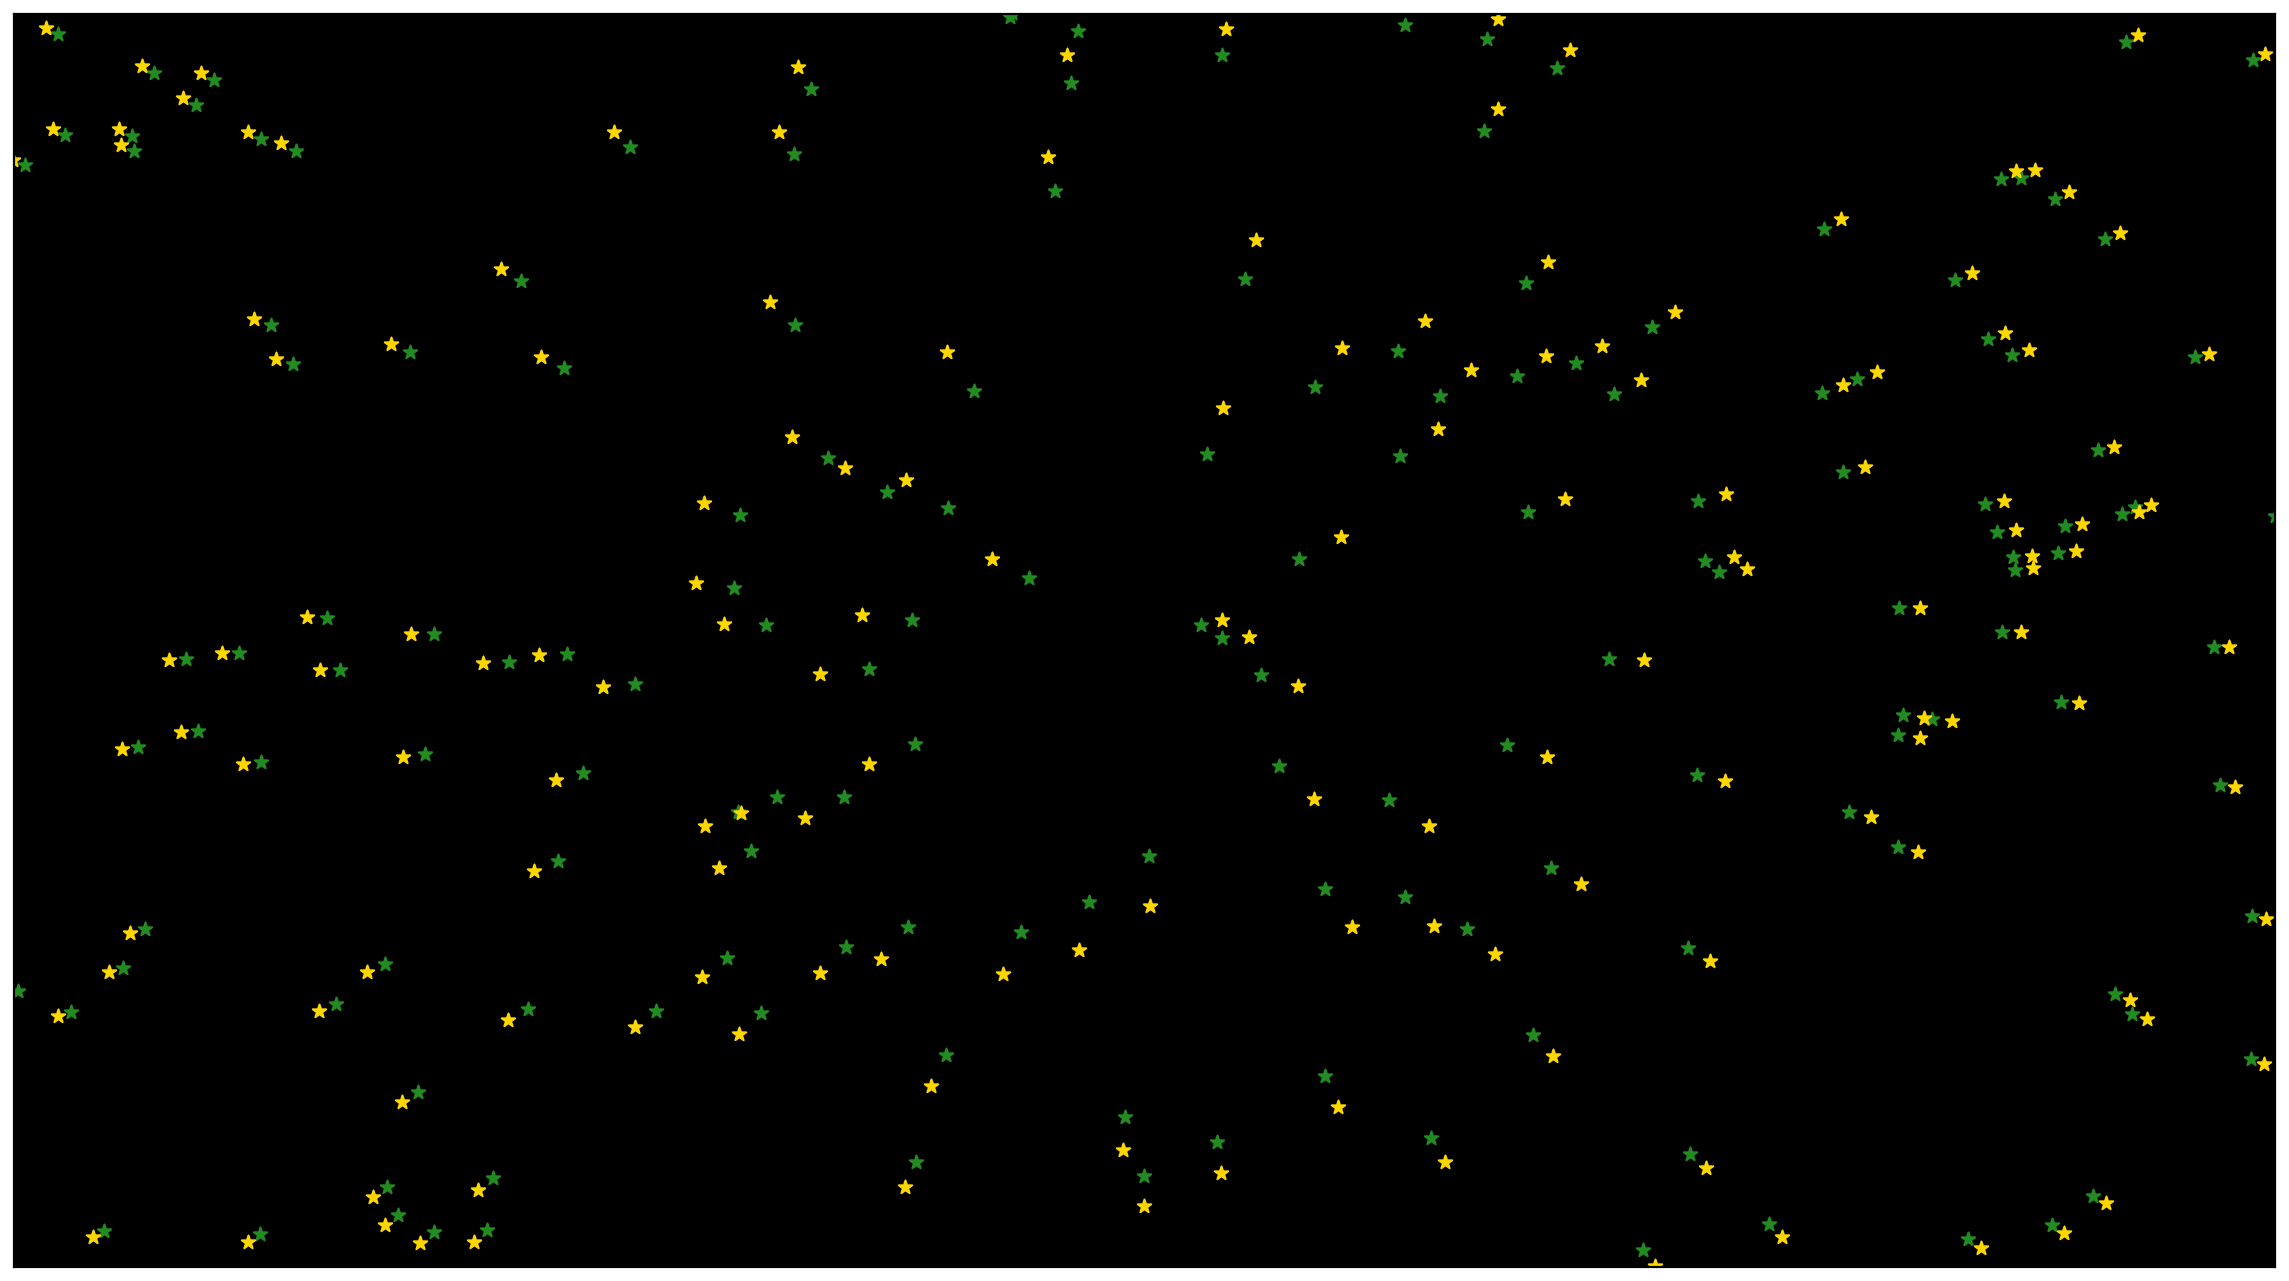

In [16]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9]
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}


anim = ds.animation(dt=10, 
                    pos_l=np.array([[-0,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.1 * pc], M_l=[4e5 * M_s],
                    D_l=[100 * kpc], n_frames=500, arrow_mult=2000, animate=False, show_lens=False, show_vel_arrows=False, show_orig=False, show_sources=True,
                   n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs ,
            n_dens = 50,
            source_pos="random")

plt.tight_layout()
plt.savefig(output_dir + "random.pdf")

anim = ds.animation(dt=10, 
                    pos_l=np.array([[-0,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.1 * pc], M_l=[4e5 * M_s],
                    D_l=[100 * kpc], n_frames=500, arrow_mult=2000, animate=False, show_lens=False, show_vel_arrows=False, show_orig=True, show_sources=True,
                   n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs ,
            n_dens = 50,
            source_pos="random")

plt.tight_layout()
plt.savefig(output_dir + "random_orig.pdf")


## Star grid with velocity arrows

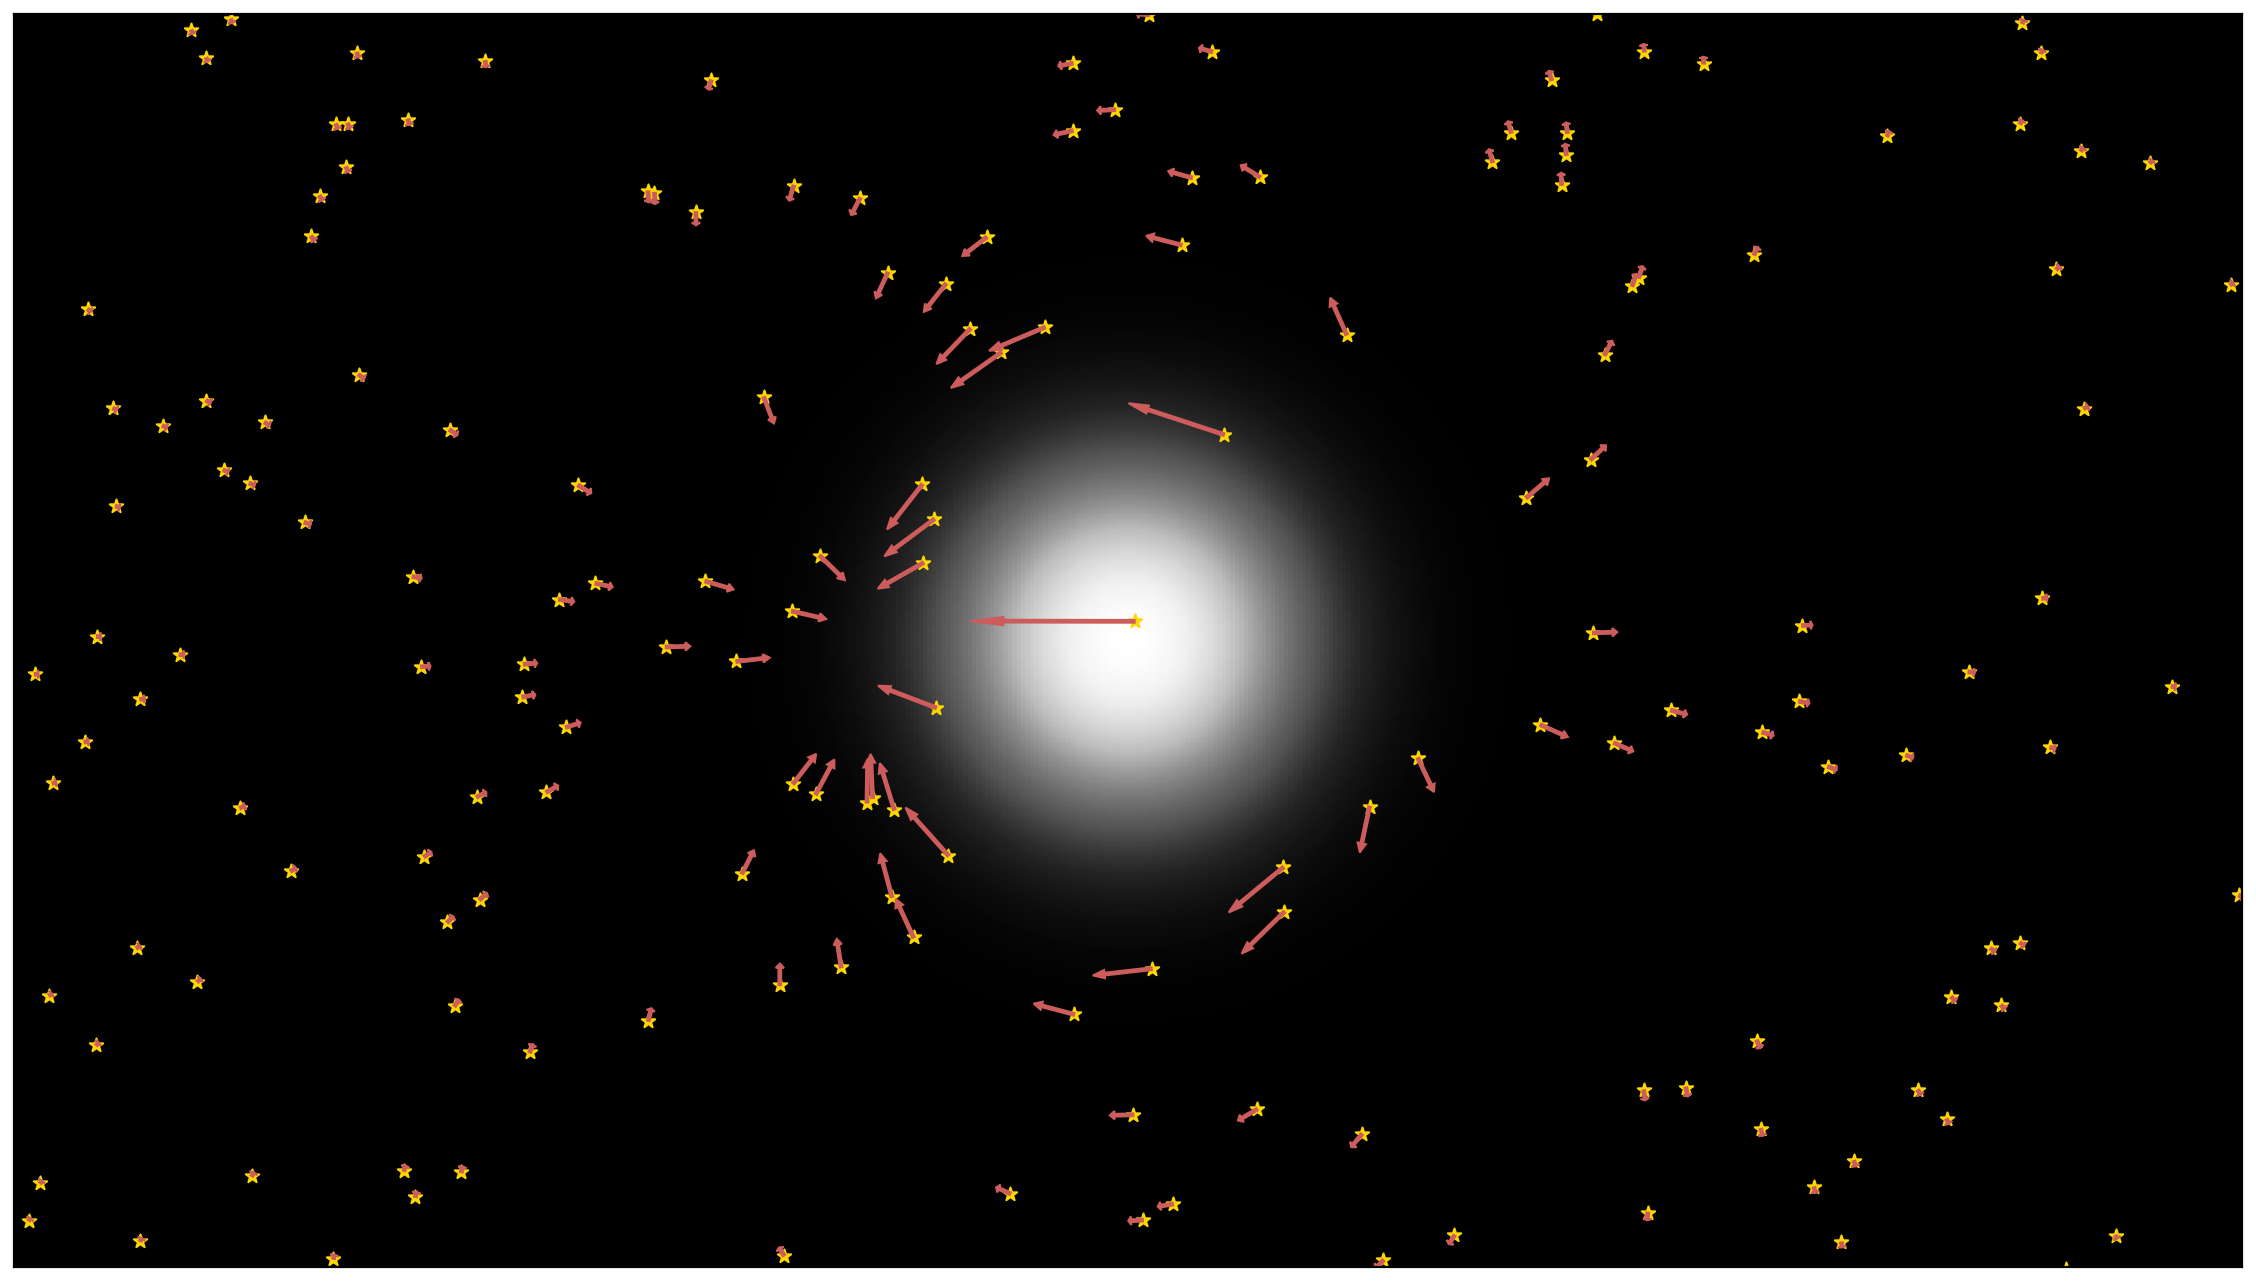

In [17]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9]
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[0.,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.08 * pc], M_l=[5e5 * M_s],
                    D_l=[100 * kpc], n_frames=1000, arrow_mult=3000, animate=False, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs ,
                    n_dens = 50,
                    source_pos="random")

plt.tight_layout()
plt.savefig(output_dir + "velocity_random.pdf")

## Uniform star grid with velocity arrows

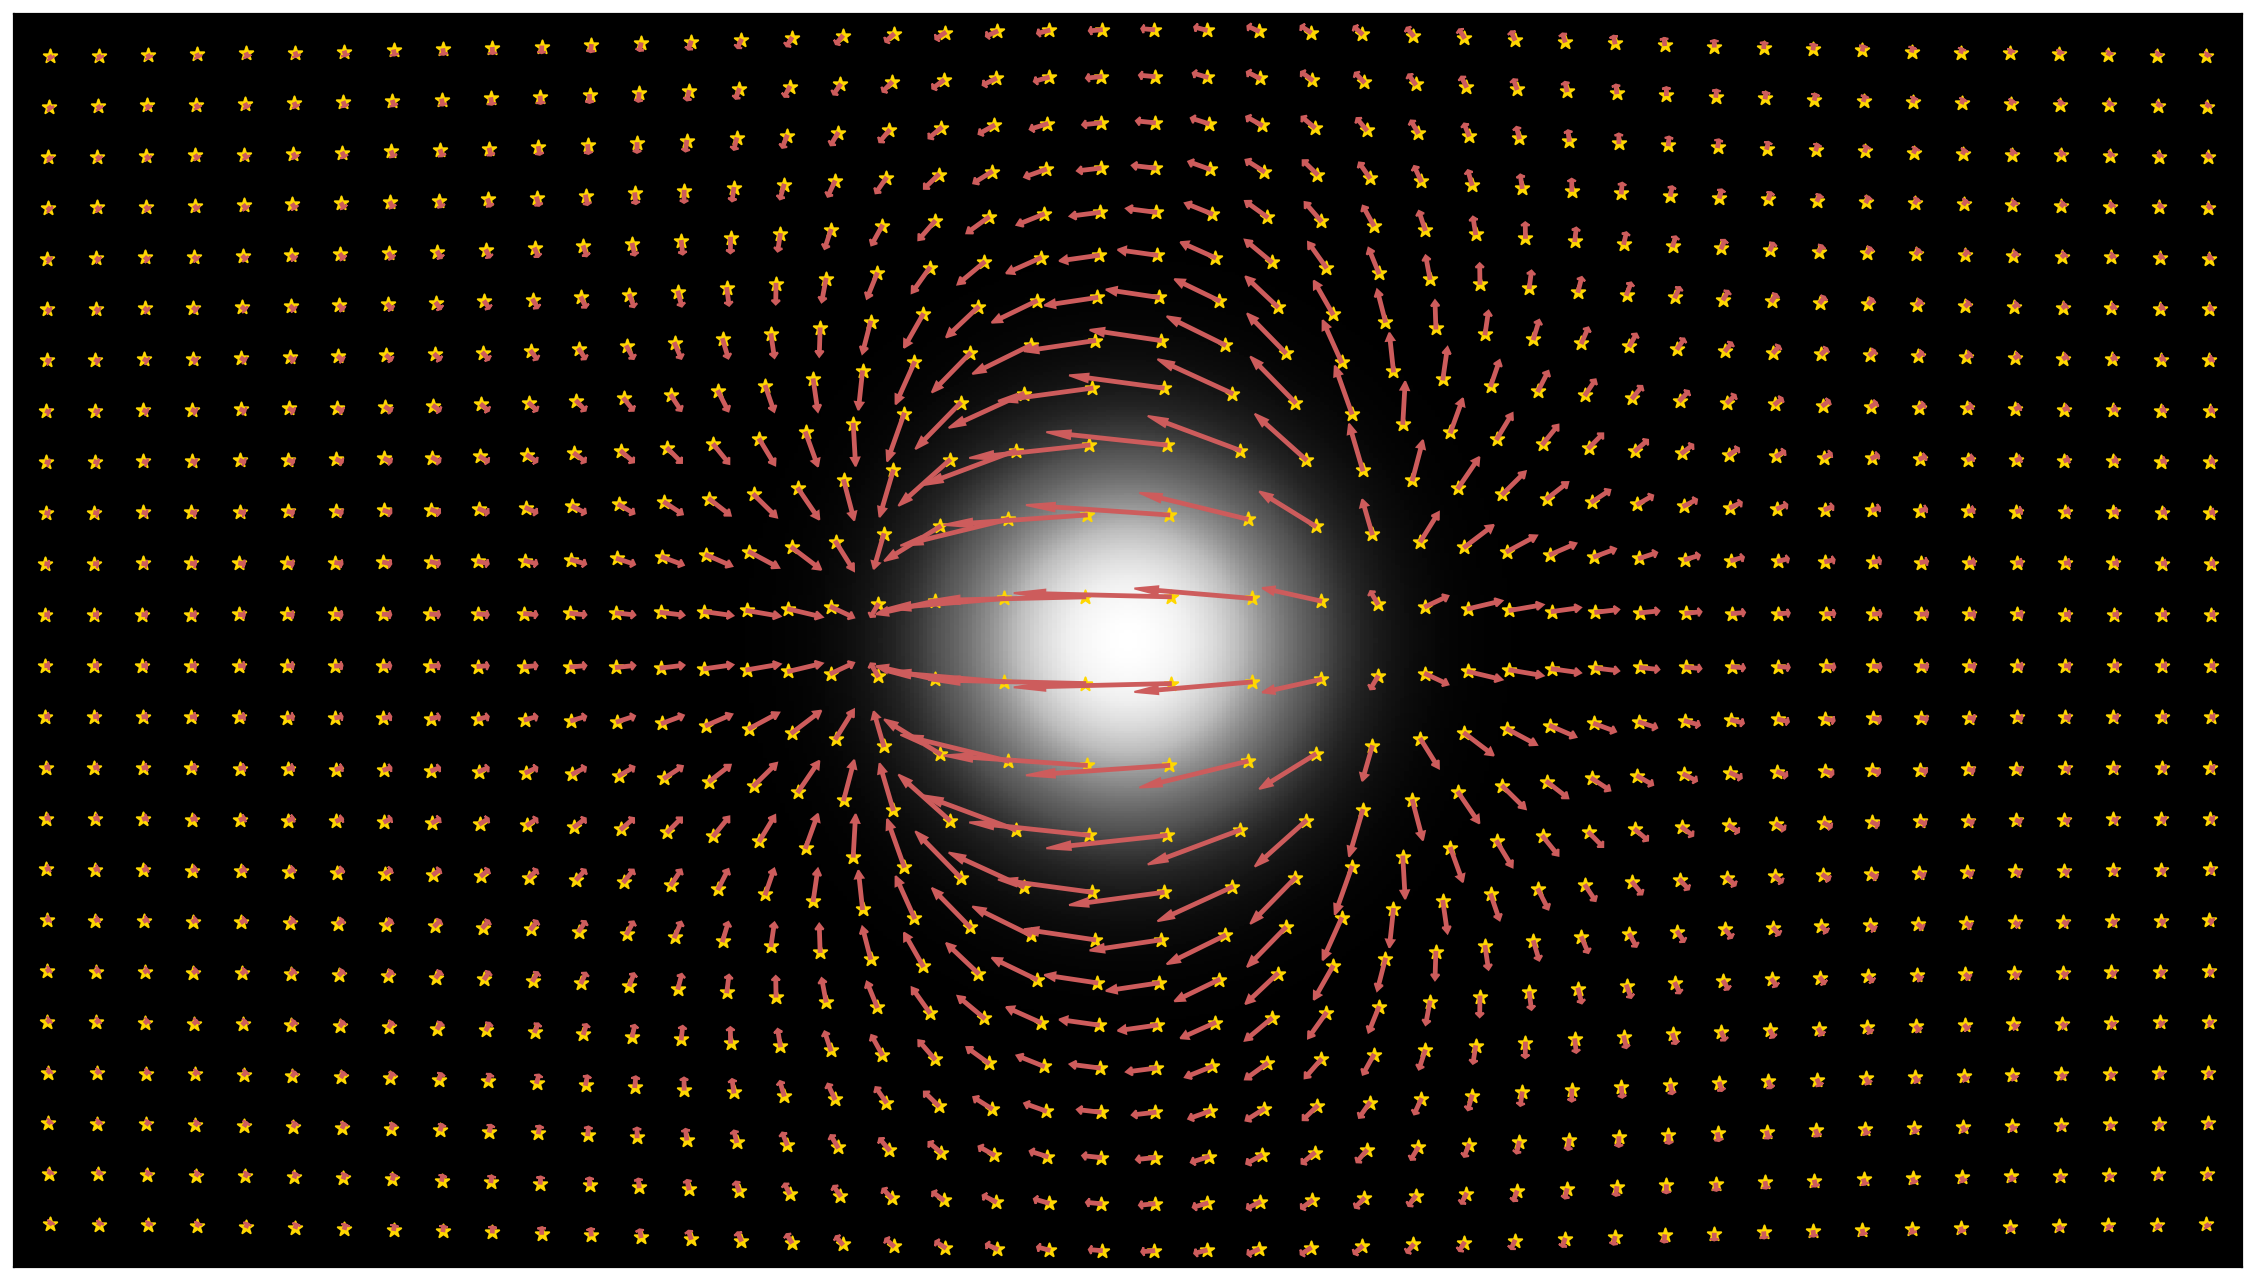

In [18]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9]
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[0.,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.08 * pc], M_l=[5e5 * M_s],
                    D_l=[100 * kpc], n_frames=1000, arrow_mult=3000, animate=False, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs ,
                    n_dens = 200,
                    source_pos="uniform")

plt.tight_layout()
plt.savefig(output_dir + "velocity_dipole.pdf")

## Hidden and non-hidden lens passing through field

In [ ]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] 
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[-1.6,-0.2]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.06 * pc], M_l=[5e5 * M_s],
                    D_l=[100 * kpc], n_frames=3000, arrow_mult=2000, animate=True, show_lens=False, show_vel_arrows=False, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 50,
                    source_pos="random"
        )

# HTML(anim.to_html5_video())
anim.save(output_dir + "hidden_lens.mp4")

In [32]:
anim = ds.animation(dt=10, 
                    pos_l=np.array([[-1.6,-0.2],[-4.8,-0.2]]), v_l=np.array([[50,0],[50,0]]) * Kmps, R_l=[0.08 * pc, 0.08 * pc], M_l=[5e5 * M_s, 5e5 * M_s],
                    D_l=[100 * kpc, 100 * kpc], n_frames=3000, arrow_mult=2000, animate=True, show_lens=True, show_vel_arrows=False, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 50,
                    source_pos="random"
        )

# HTML(anim.to_html5_video())
anim.save(output_dir + "nonhidden_lens.mp4")

## Blips, hidden lens

In [215]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9]
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[-1.,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.01 * pc], M_l=[5e5 * M_s],
                    D_l=[100 * kpc], n_frames=3000, arrow_mult=2000, animate=True, show_lens=False, show_vel_arrows=False, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 25,
                    source_pos="random",
                    custom_source_pos=np.array([[-0.5,0.01], [0.1,0.01], [0.13,-0.01]]))

# HTML(anim.to_html5_video())
anim.save(output_dir + "blips_hidden.mp4")

## Blips, showing lens

In [216]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9]
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[-1.,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.01 * pc], M_l=[5e5 * M_s],
                    D_l=[100 * kpc], n_frames=2000, arrow_mult=2000, animate=True, show_lens=True, show_vel_arrows=False, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 25,
                    source_pos="random",
                    custom_source_pos=np.array([[-0.5,0.01], [0.1,0.01], [0.13,-0.01]]))

HTML(anim.to_html5_video())
anim.save(output_dir + "blips.mp4")

## Comparison of compact and extended lenses

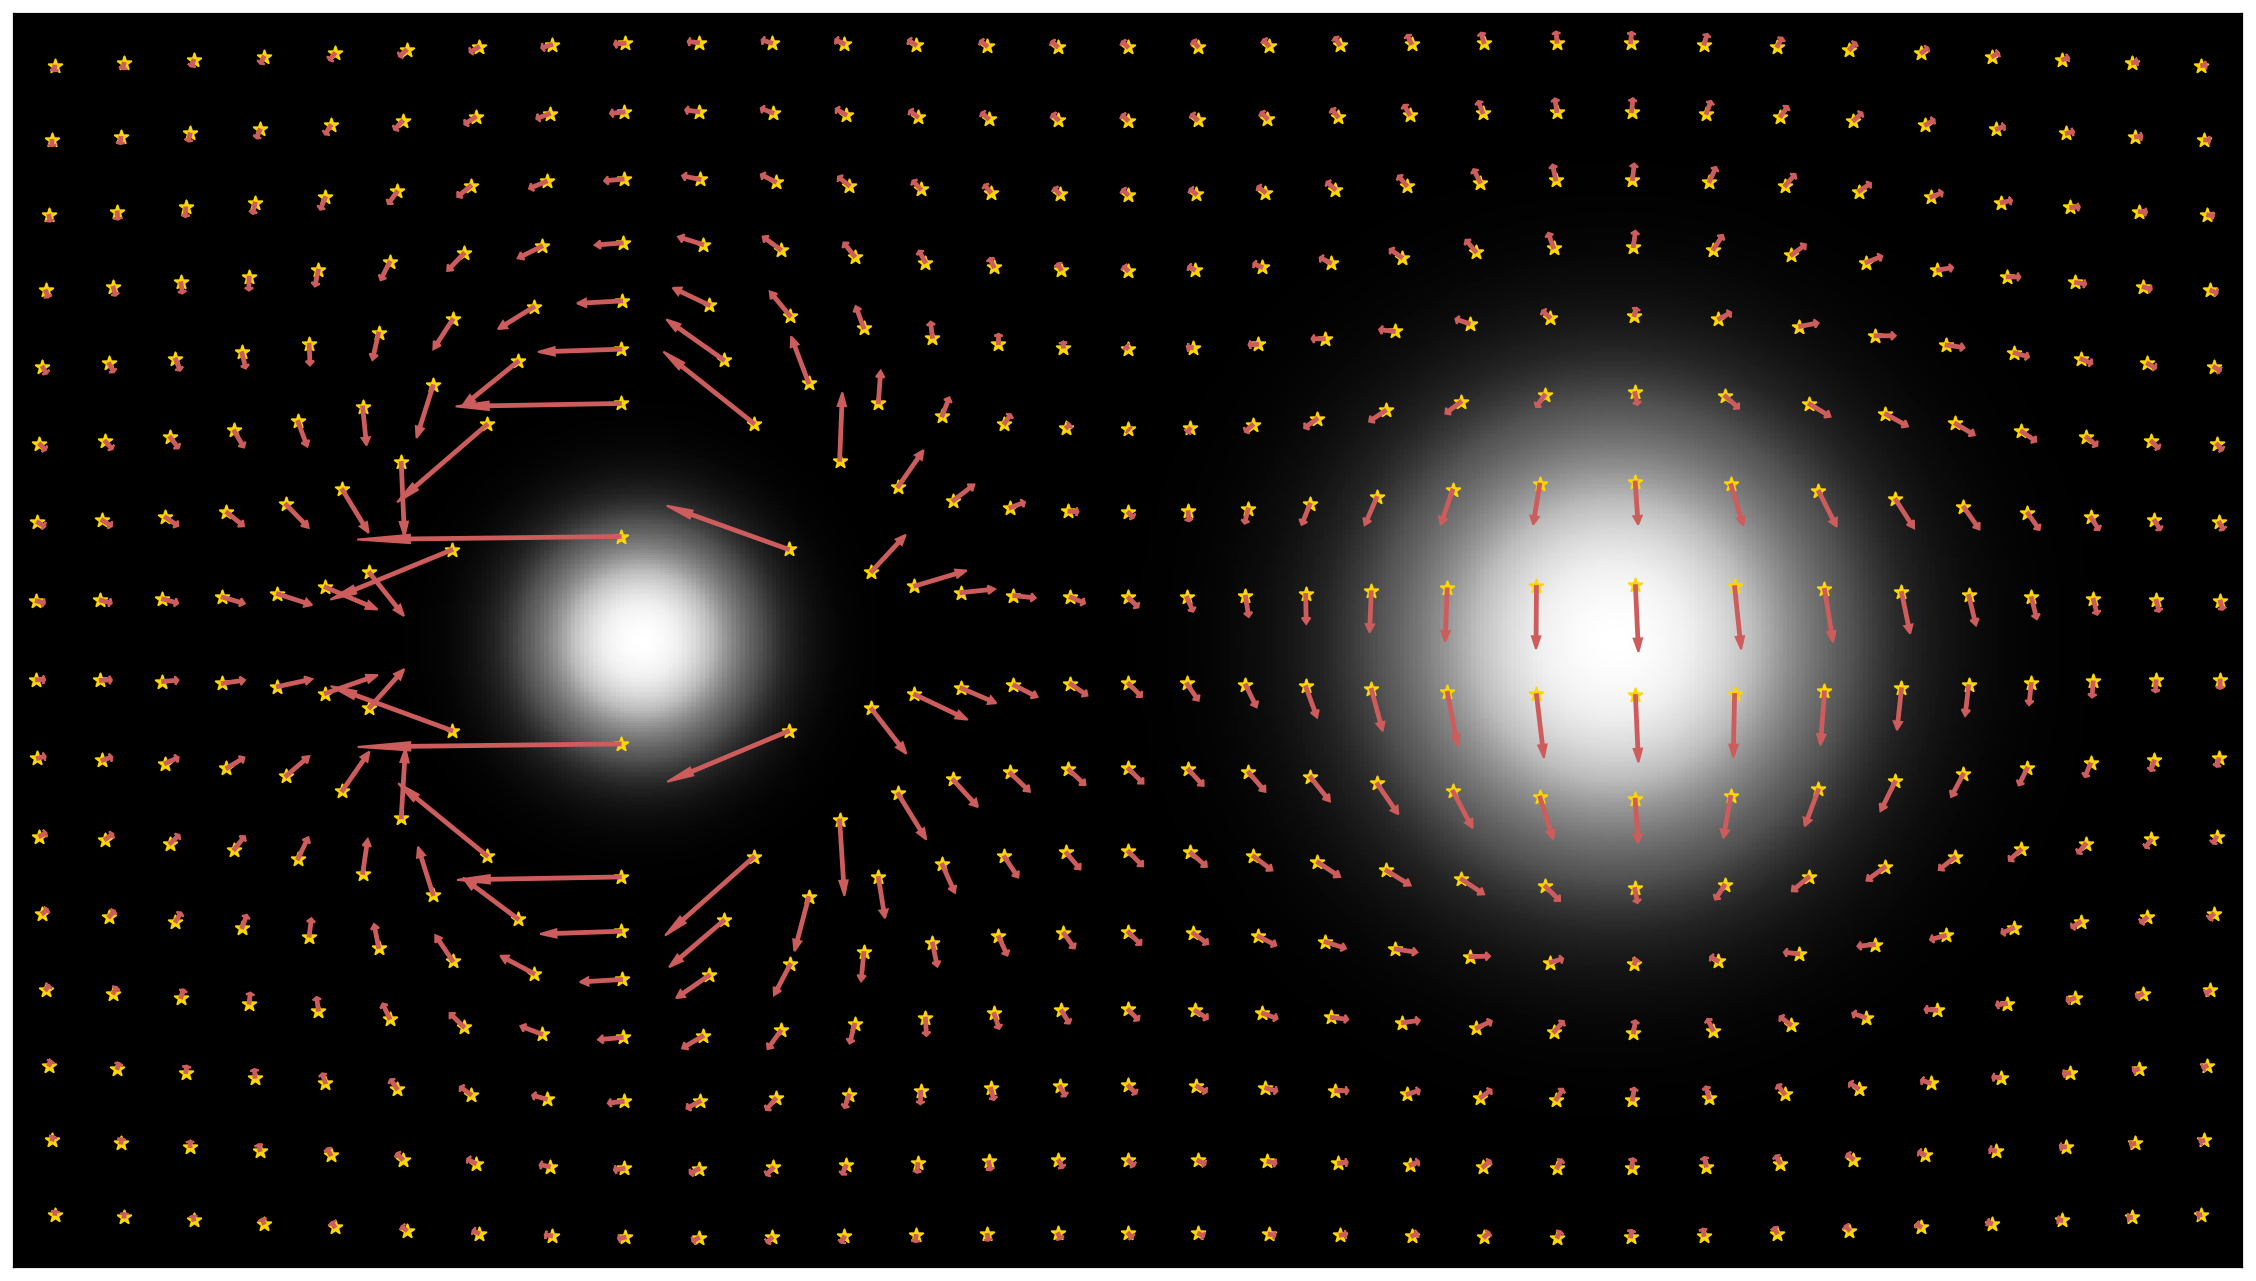

In [743]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] 
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[-0.7,0],[0.7,0]]), v_l=np.array([[50,0],[0,50]]) * Kmps, R_l=[0.05 * pc,0.1 * pc], M_l=[5e5 * M_s,5e5 * M_s],
                    D_l=[100 * kpc,100 * kpc], n_frames=1000, arrow_mult=2000, animate=False, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 100,
                    source_pos="uniform")

plt.tight_layout()
plt.savefig(output_dir + "size.pdf")

## Velocity templates

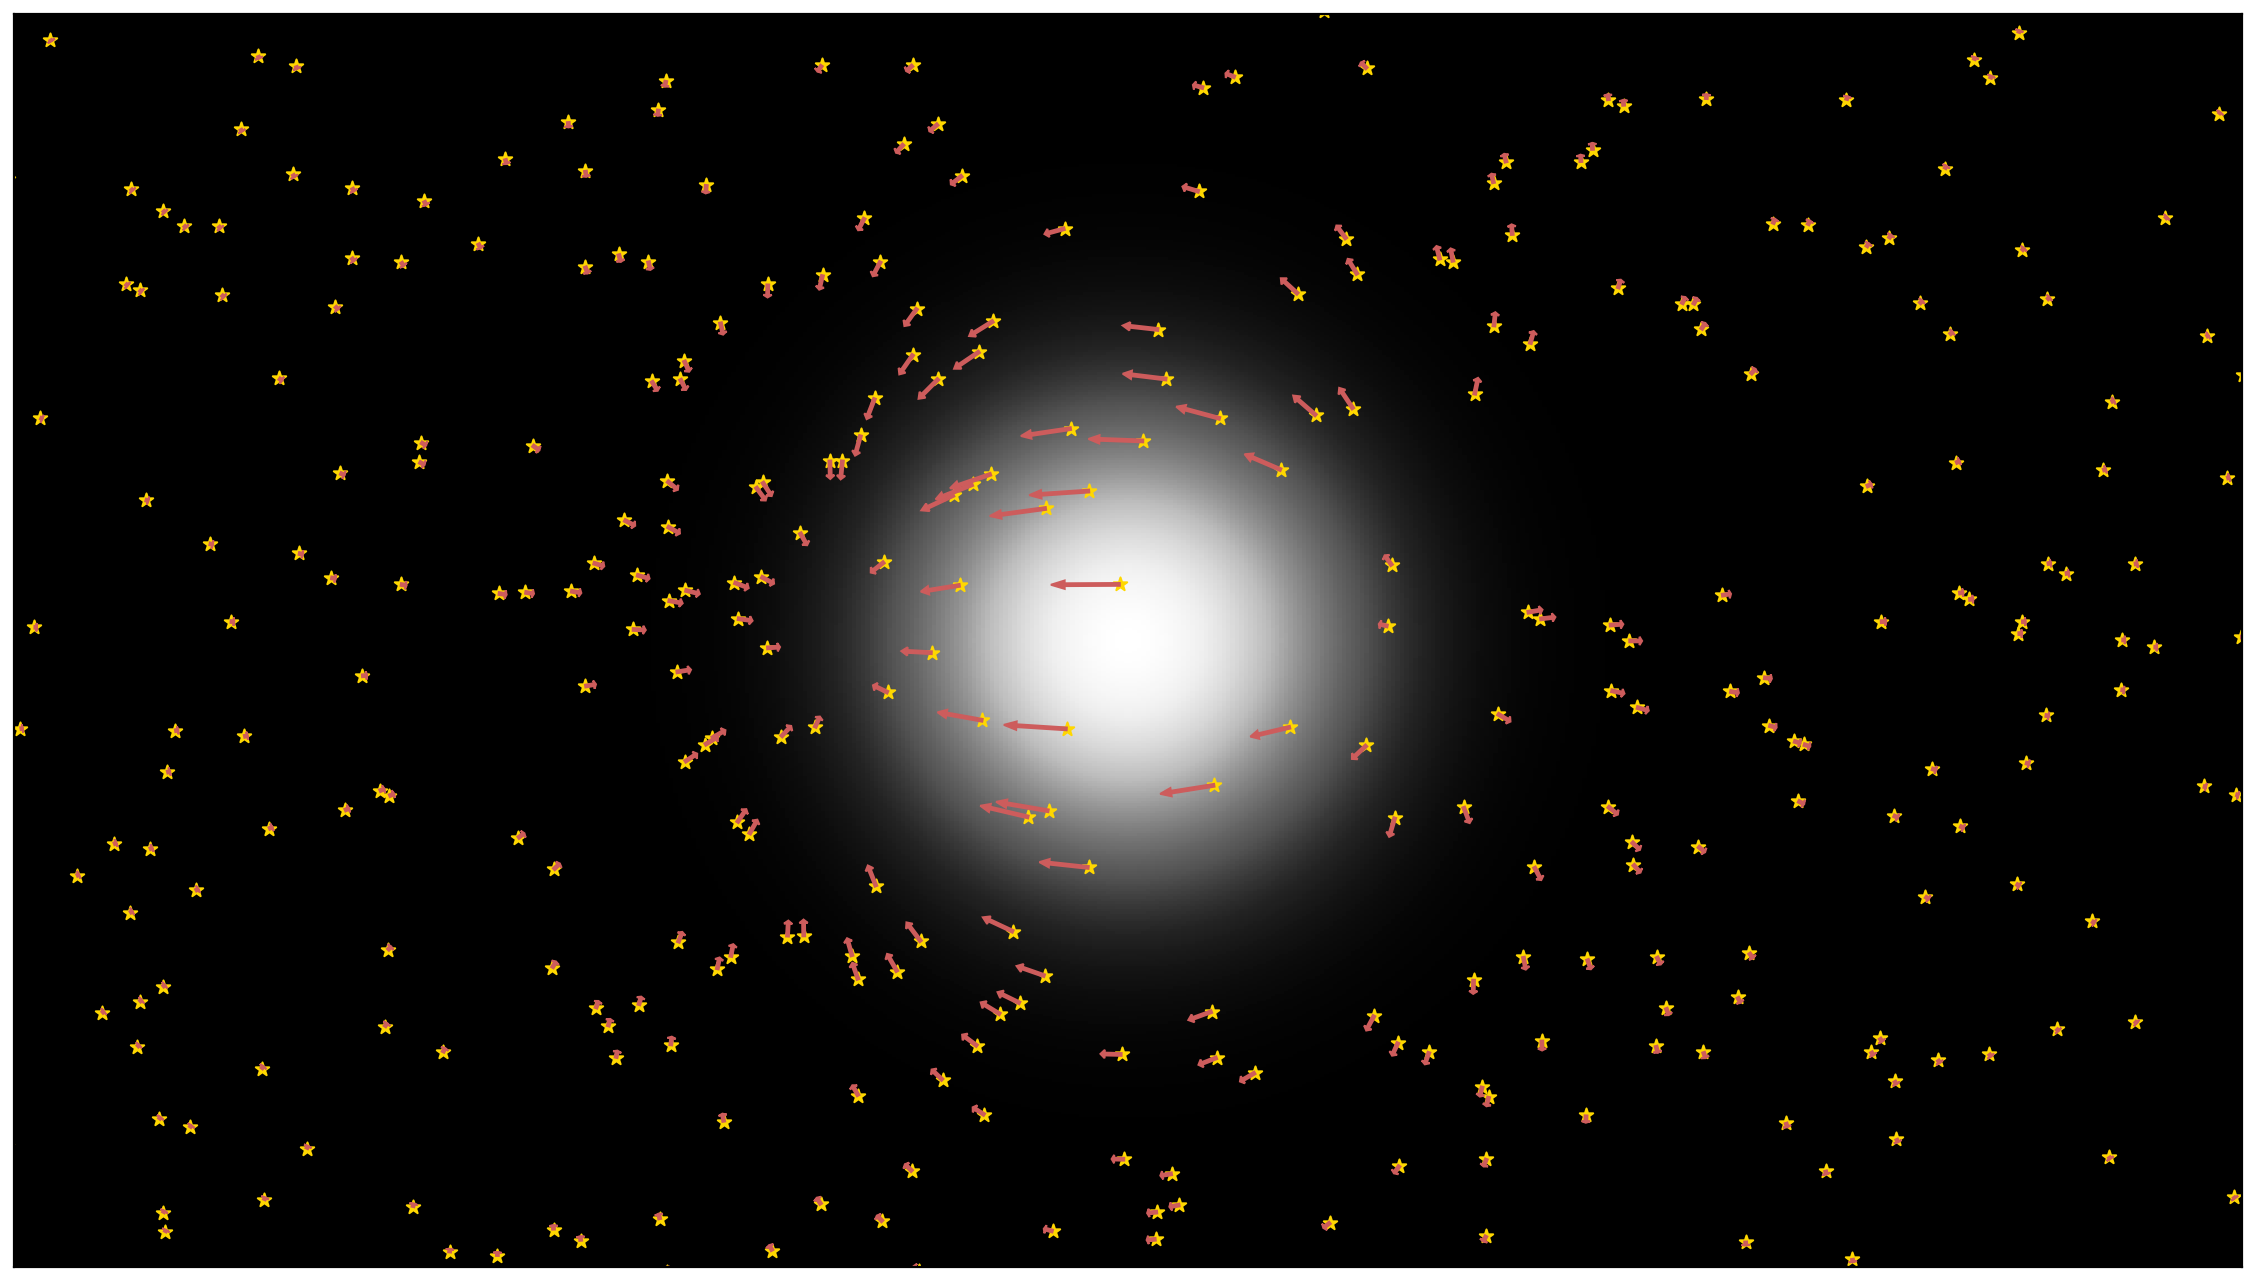

In [746]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] 
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[0,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.1 * pc], M_l=[5e5 * M_s],
                    D_l=[100 * kpc], n_frames=1000, arrow_mult=2000, animate=False, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 100,
                    source_pos="random")

plt.tight_layout()
plt.savefig(output_dir + "templates.pdf")

## Many lenses, with velocity arrows

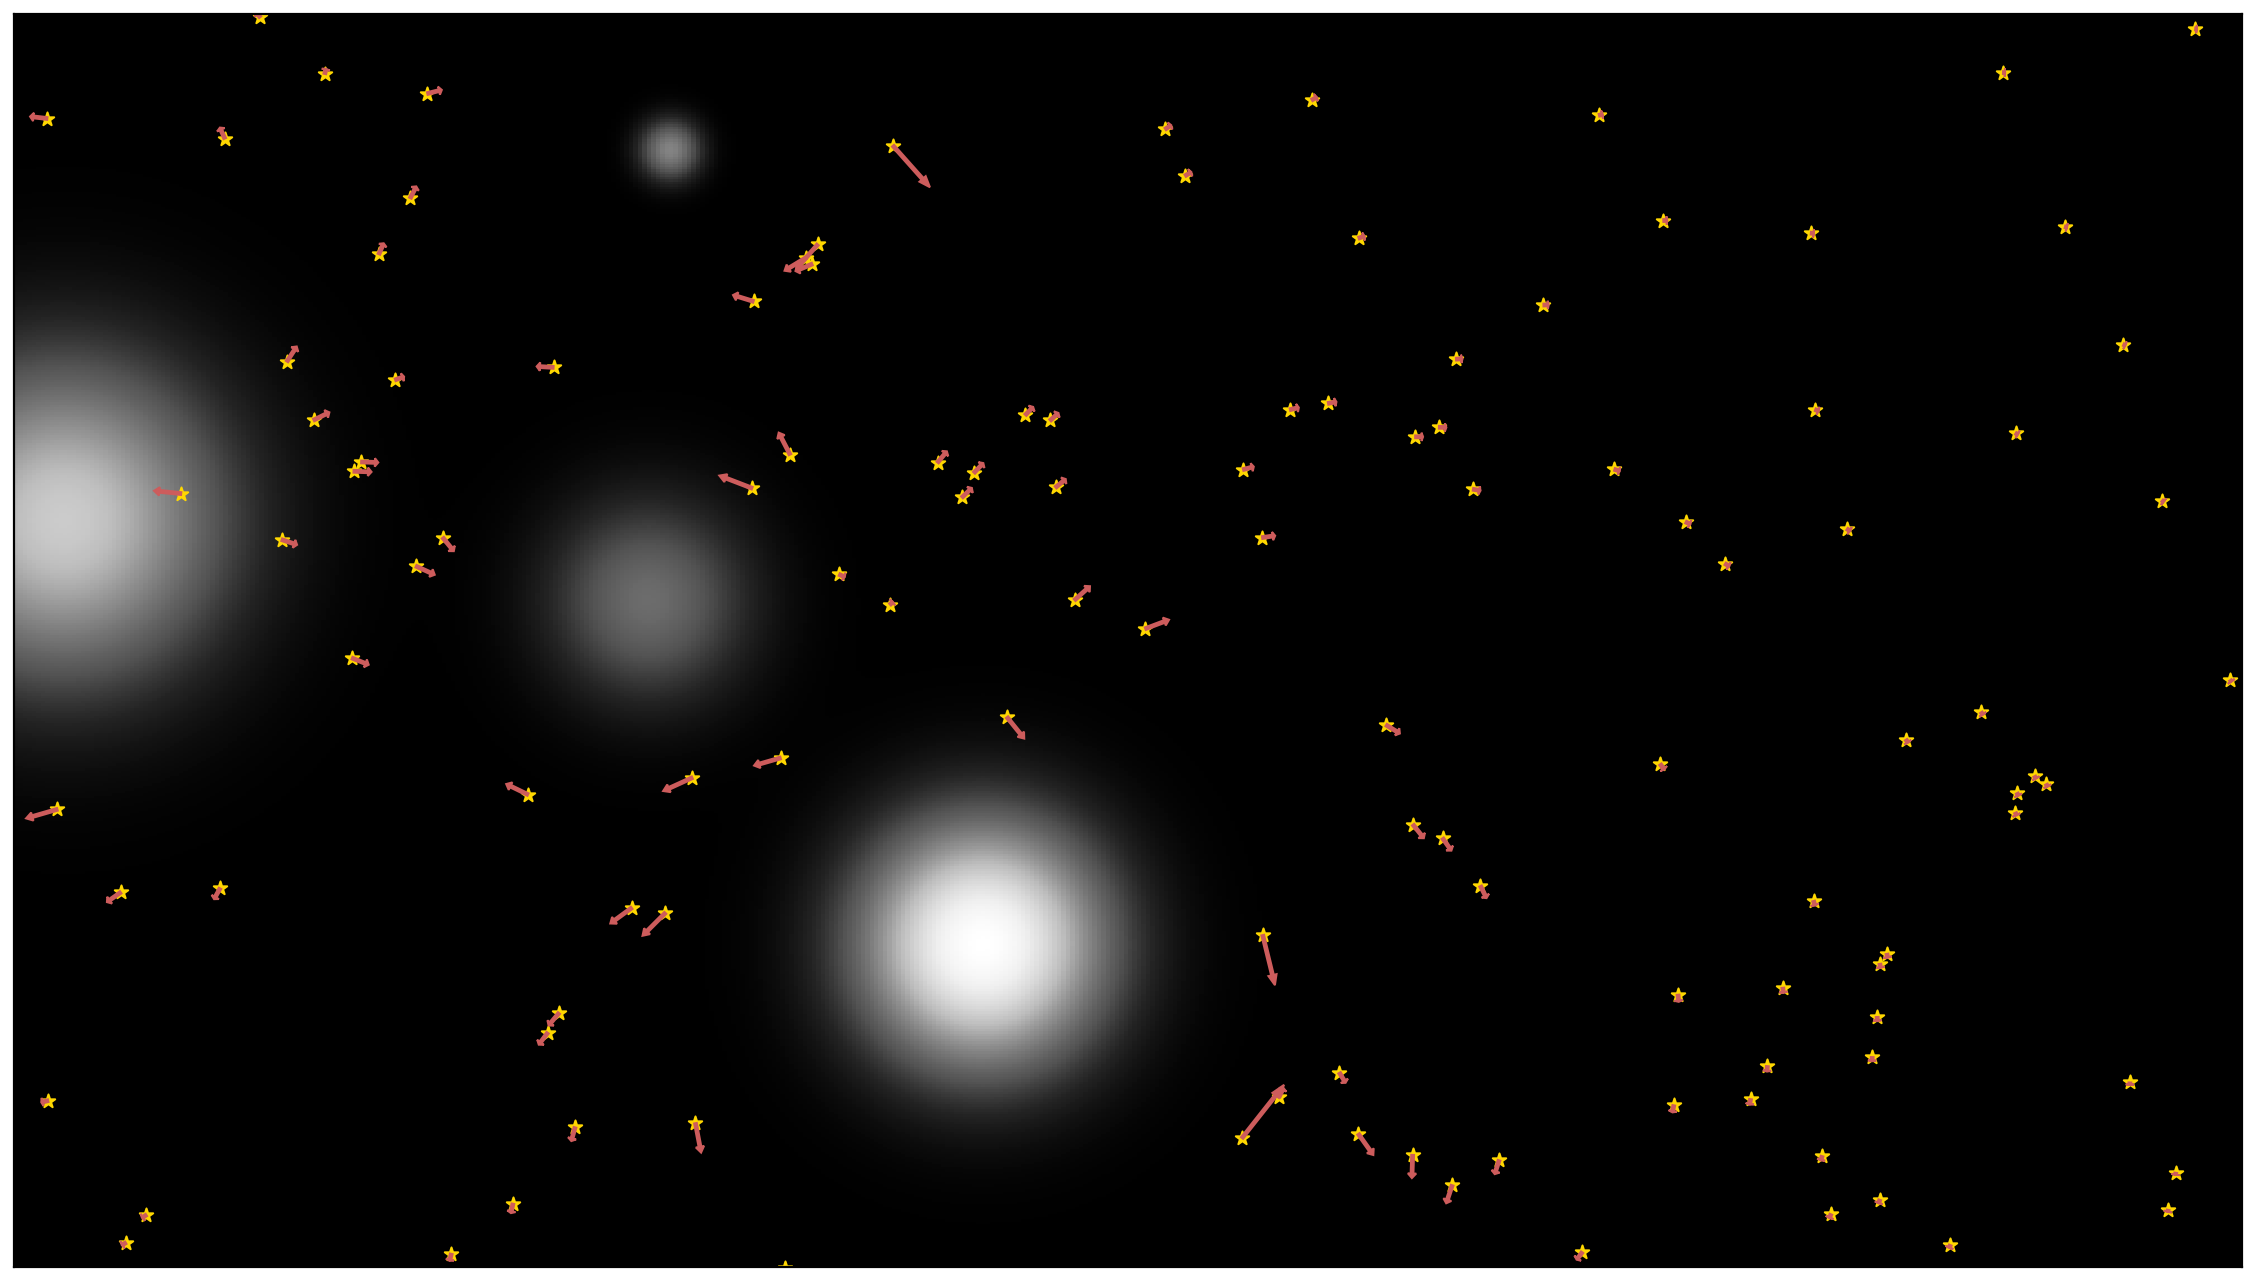

In [61]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] 
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'gold','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

n_lens = 5

pos_l_ary = np.transpose([np.random.uniform(-1.6, 1.6, n_lens), np.random.uniform(-0.9, 0.9, n_lens)])
v_l_ary = np.transpose([np.random.normal(0, 20, n_lens), np.random.normal(0, 20, n_lens)]) * Kmps
R_l_ary = np.random.uniform(0, 0.1, n_lens) * pc
M_l_ary = 10 ** np.random.uniform(5, 6, n_lens) * M_s

anim = ds.animation(dt=10, 
                    pos_l=pos_l_ary, v_l=v_l_ary, R_l=R_l_ary, M_l=M_l_ary,
                    D_l=len(M_l_ary)*[100 * kpc], n_frames=1000, arrow_mult=2000, animate=False, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 50,
                    source_pos="random")

plt.tight_layout()
plt.savefig(output_dir + "correlations.pdf")

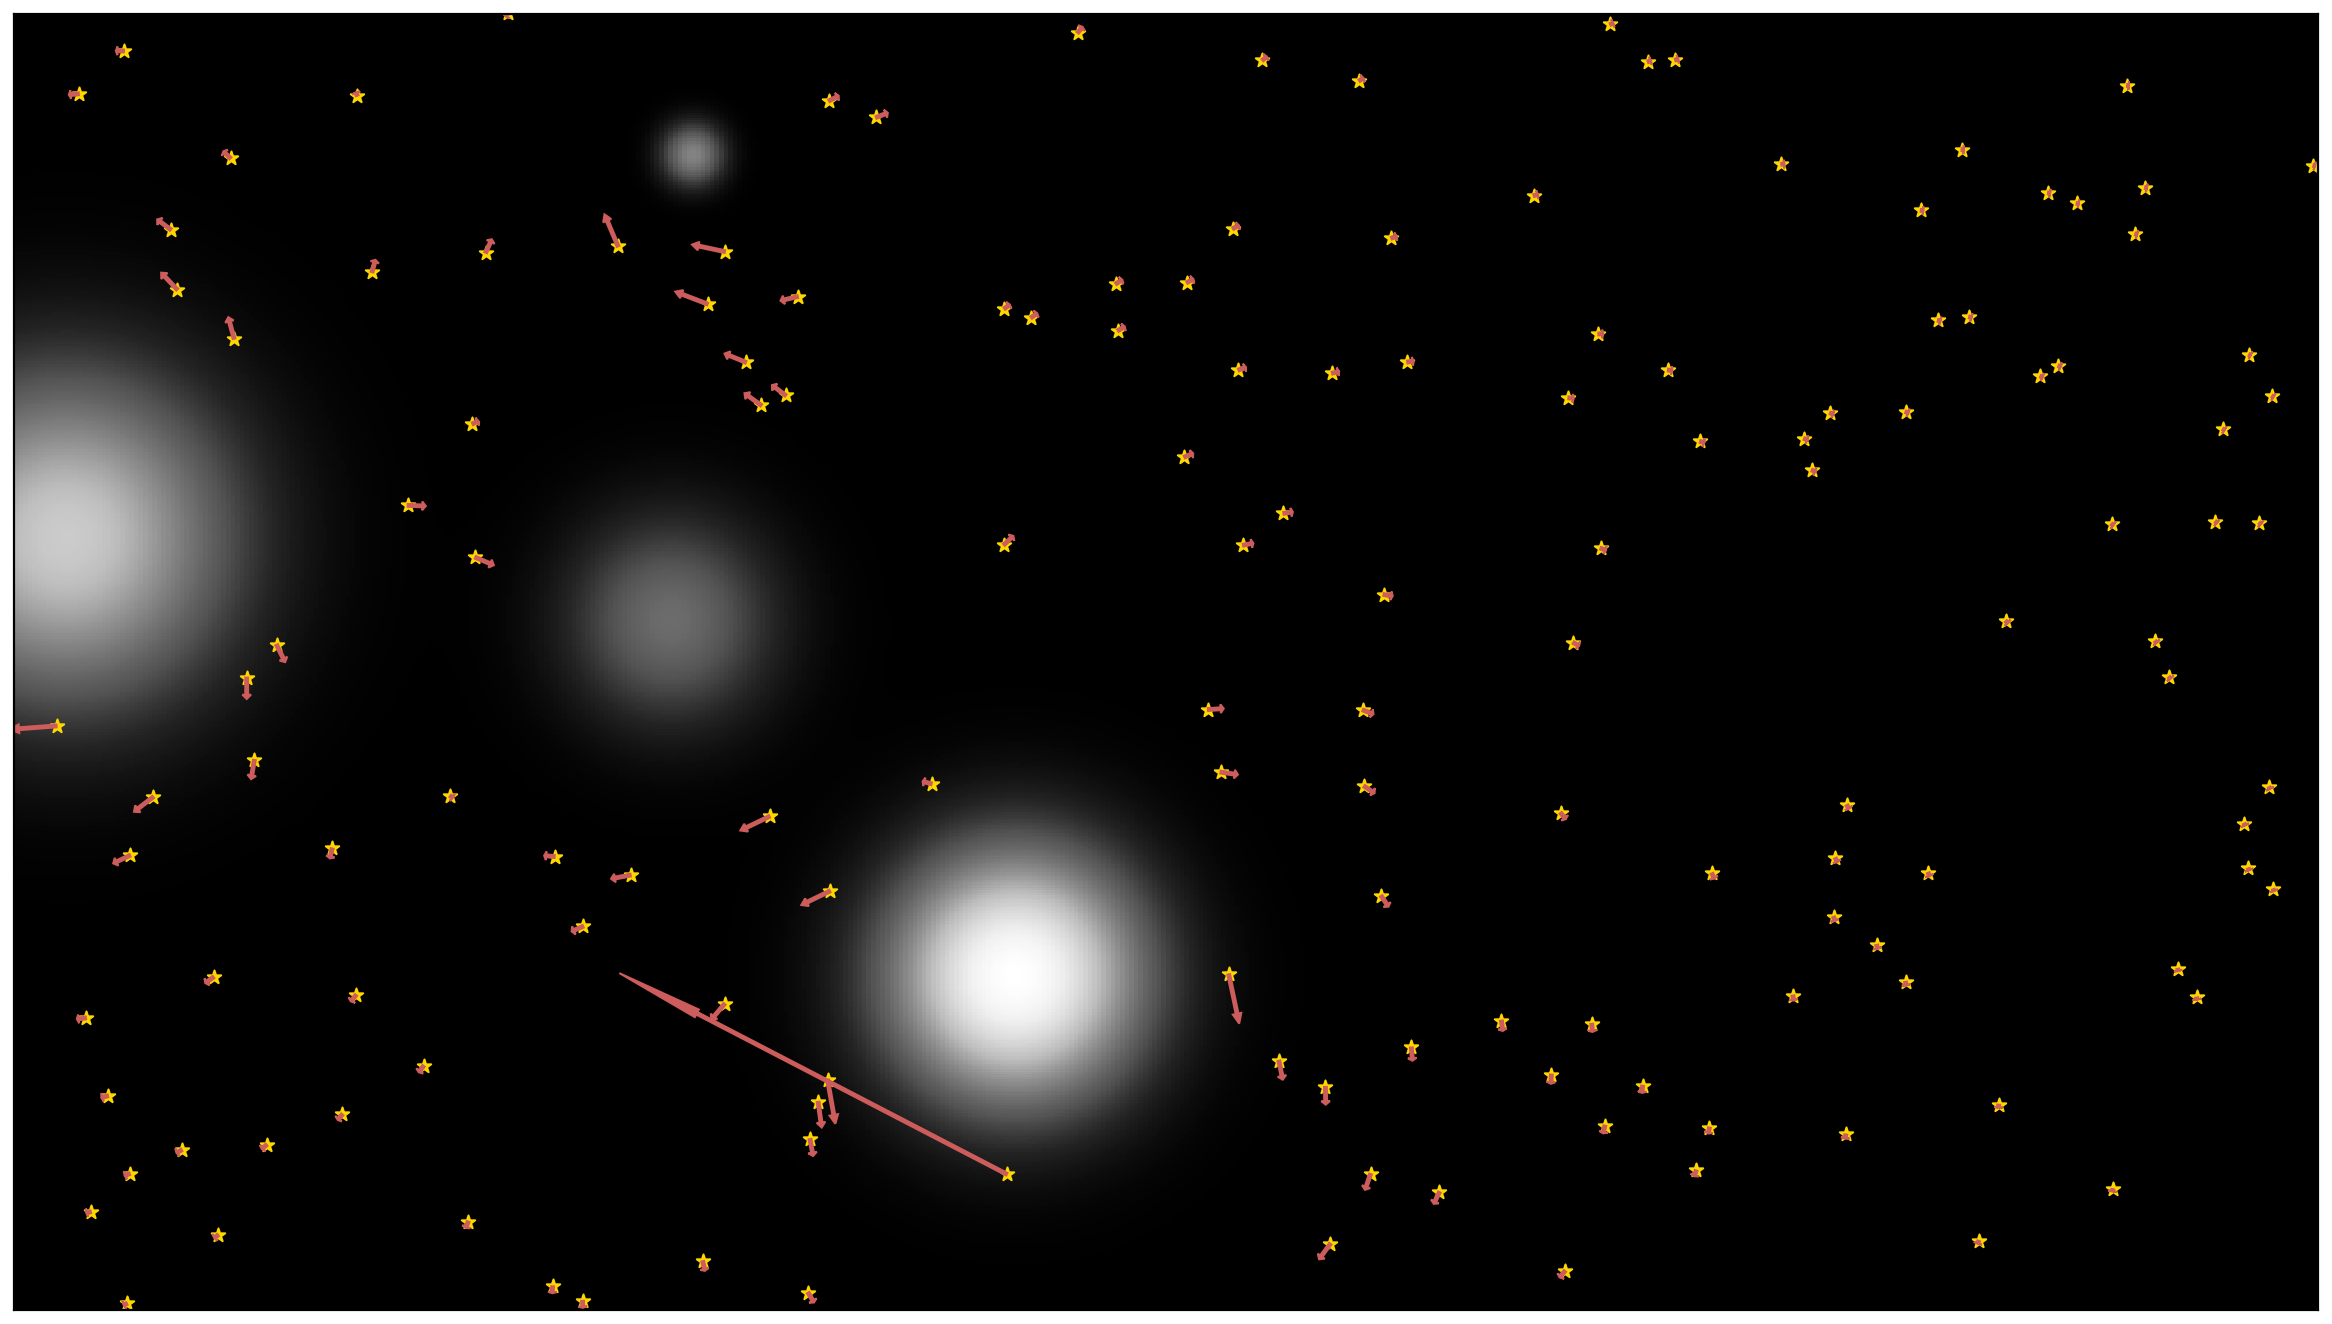

In [62]:
anim = ds.animation(dt=10, 
                    pos_l=pos_l_ary, v_l=v_l_ary, R_l=R_l_ary, M_l=M_l_ary,
                    D_l=len(M_l_ary)*[100 * kpc], n_frames=3000, arrow_mult=2000, animate=True, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 50,
                    source_pos="random")

# HTML(anim.to_html5_video())
anim.save(output_dir + "correlations.mp4")

## Velocity outliers

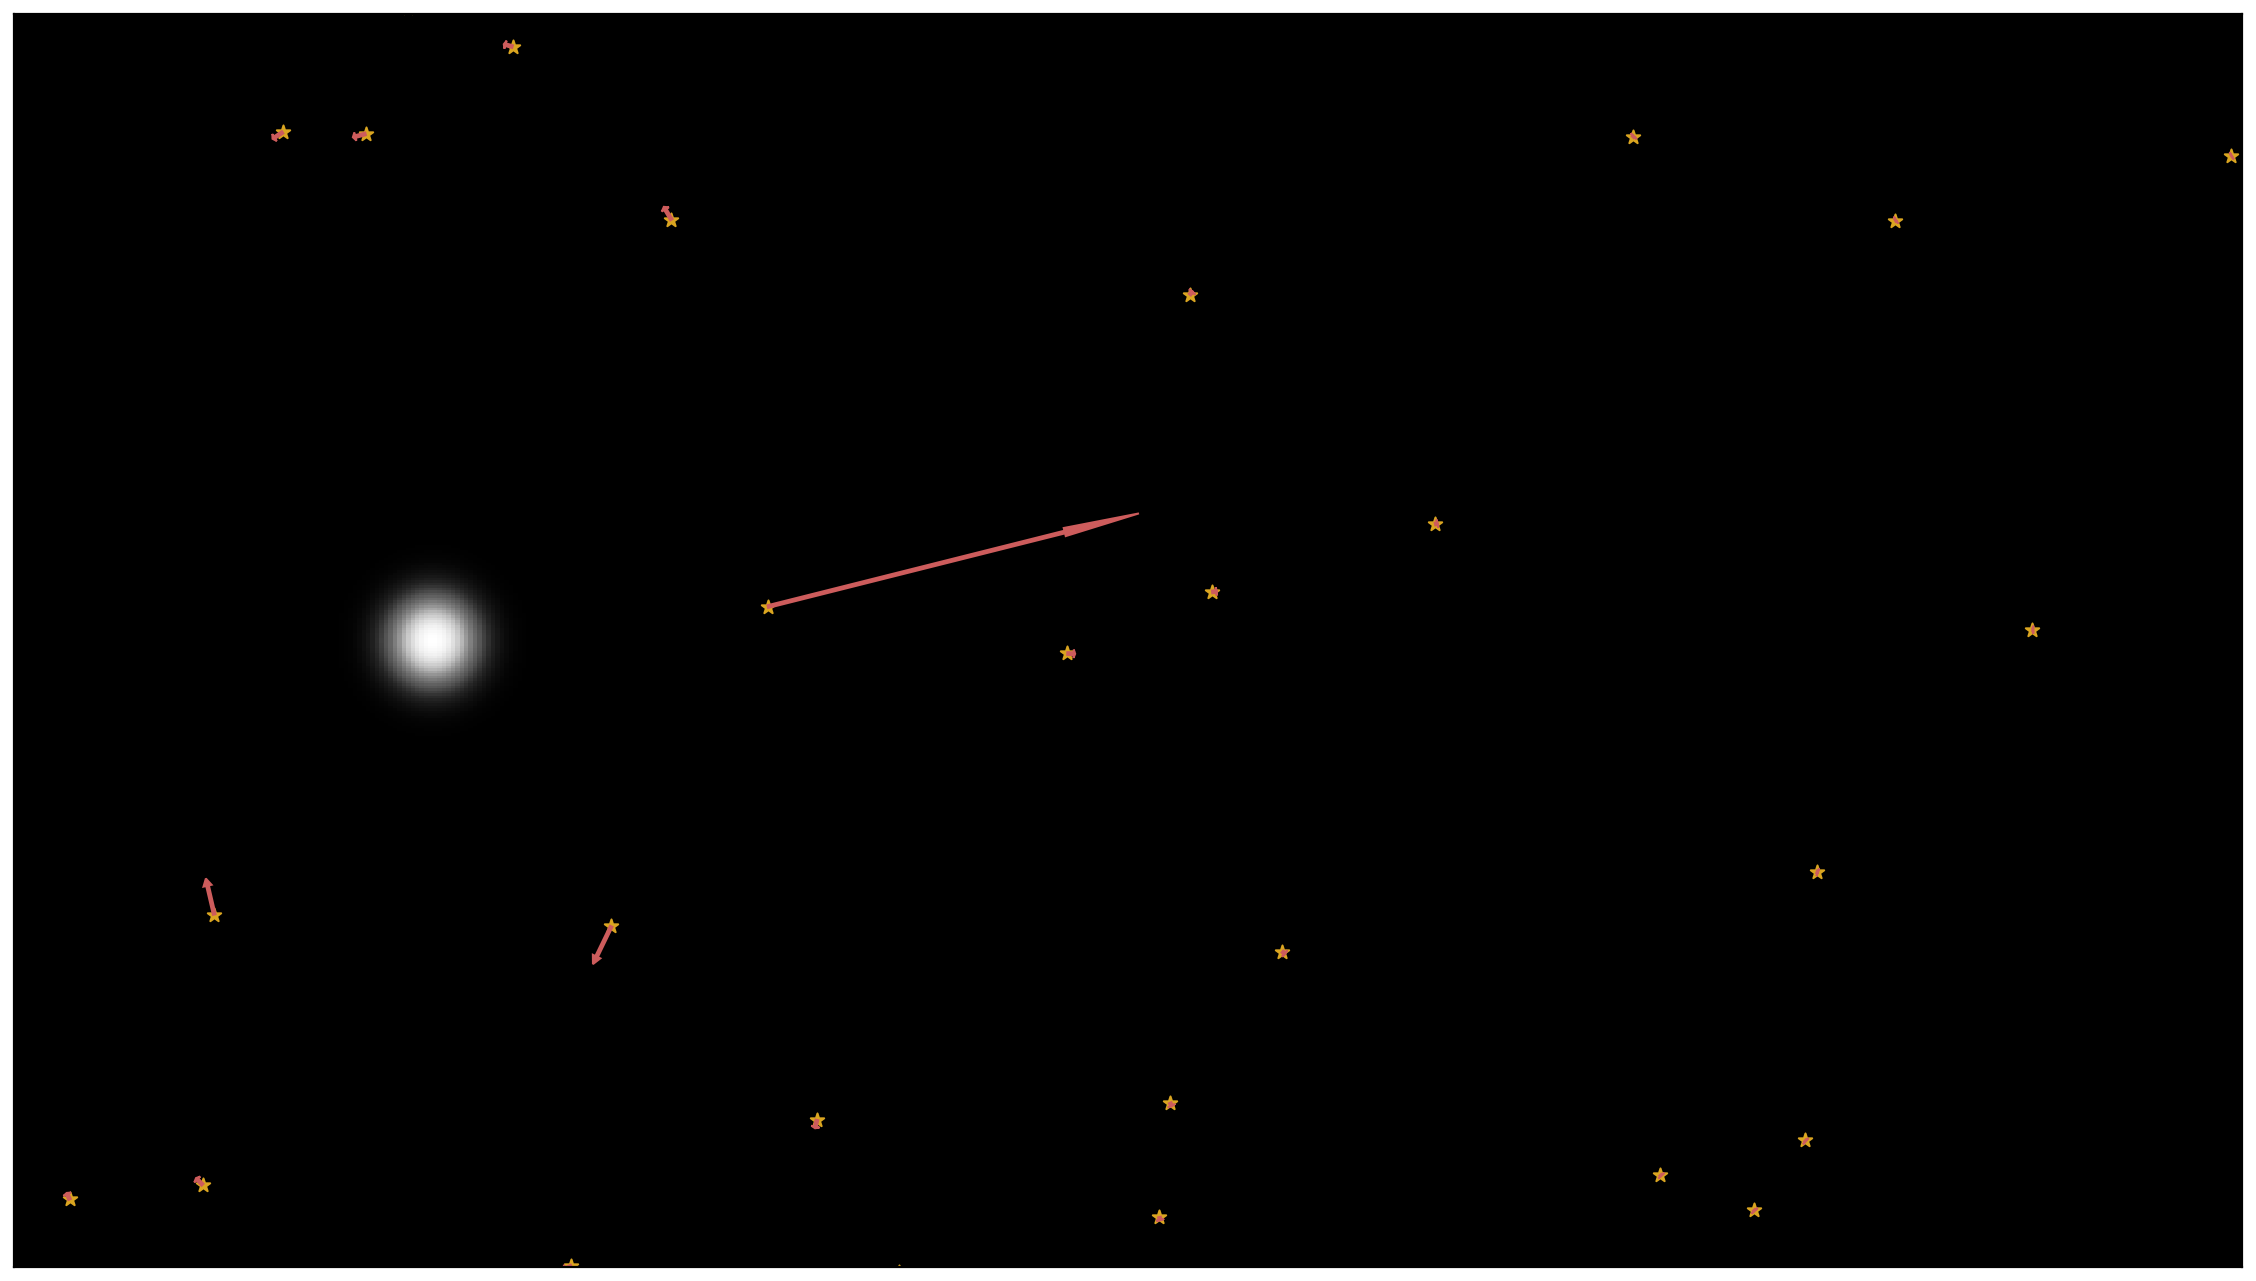

In [762]:
ds = DemoSim(theta_x_lims = [-1.6, 1.6],
            theta_y_lims = [-0.9, 0.9] 
)

arrow_kwargs={'color':'indianred', 'width':0.02}
star_kwargs={'marker':'*', 'color':'goldenrod','s':50}
star_orig_kwargs={'marker':'*', 'color':'forestgreen','s':50}

anim = ds.animation(dt=10, 
                    pos_l=np.array([[-1.,0]]), v_l=np.array([[50,0]]) * Kmps, R_l=[0.02 * pc], M_l=[5e5 * M_s],
                    D_l=[100 * kpc], n_frames=2000, arrow_mult=2000, animate=False, show_lens=True, show_vel_arrows=True, show_orig=False, show_sources=True,
                    n_lens_x=500, n_lens_y=500, star_kwargs=star_kwargs, arrow_kwargs=arrow_kwargs, star_orig_kwargs=star_orig_kwargs,
                    n_dens = 10,
                    source_pos="random",
                    custom_source_pos=np.array([[-0.9,0.01]]))

plt.tight_layout()
plt.savefig(output_dir + "outliers.pdf")